In [86]:
# Imports
import pandas as pd
import numpy as np
import json as json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [87]:
 # Loading the data from CSV into panadas dataframe
tempIncomeStatement = pd.read_csv (r'../data/income_statement.csv', sep=',')
tempCashFlow = pd.read_csv (r'../data/cash_flow.csv', sep=',')
tempBalanceSheet = pd.read_csv (r'../data/balance-sheet.csv', sep=',')
tempEarnings = pd.read_csv (r'../data/EARNINGS.csv', sep=',')

tempMonthly = pd.read_csv (r'../data/monthly-data.csv', sep=',')
TickerSymbols = pd.read_csv (r'../data/nasdaq_screener_sorted_values.csv', sep=',')

In [88]:
# Printing Income statement
print(tempIncomeStatement)
print(tempIncomeStatement.columns)

# Printing Cash Flow
print(tempCashFlow.shape)
print(tempCashFlow.columns)

# Printing Balance Sheet
print(tempBalanceSheet.shape)
print(tempBalanceSheet.columns)

# Printing Earnings
print(tempEarnings.shape)
print(tempEarnings.columns)

     fiscalDateEnding reportedCurrency  grossProfit  totalRevenue  \
0          2021-09-30              USD  35174000000   82688000000   
1          2021-06-30              USD  35255000000   80769000000   
2          2021-03-31              USD  38079000000   88914000000   
3          2020-12-31              USD  44328000000  110801000000   
4          2020-09-30              USD  24689000000   64698000000   
...               ...              ...          ...           ...   
3899       2017-05-31              USD    345500000     572700000   
3900       2017-02-28              USD    325900000     566400000   
3901       2016-11-30              USD    356900000     623700000   
3902       2016-08-31              USD    326900000     597300000   
3903       2016-05-31              USD    248800000     710500000   

     costOfRevenue costofGoodsAndServicesSold operatingIncome  \
0      53802000000                48186000000     23786000000   
1      51591000000                4617900

In [89]:
# renaming Balance sheet column "fiscalDateEnding" to "timestamp" to match column name on both dataframes
tempIncomeStatement = tempIncomeStatement.rename(columns={"fiscalDateEnding": "timestamp"})
tempCashFlow = tempCashFlow.rename(columns={"fiscalDateEnding": "timestamp"})
tempBalanceSheet = tempBalanceSheet.rename(columns={"fiscalDateEnding": "timestamp"})
tempEarnings = tempEarnings.rename(columns={"fiscalDateEnding": "timestamp"})

# Merging all 4 frames into one

# Daily dates does not overlap on both dataframes, CompanyMonthly has the last trading day (not including weekends)
# While CompanyBalanaceSheet always has the last day of the month (including weekends)
# We need to cut out the daily date for both dataframes["timestamp"], to be able to merge them properly.
# Slicing the timestamp in CompanyMonthly, removing the days
sliceMonthly = tempMonthly["timestamp"].str.slice(0, -3)
tempMonthly["timestamp"] = sliceMonthly

# Printing
print("Monthly Data:")
print(tempMonthly["timestamp"])

# Slicing the timestamp in Income Statement, removing the days
sliceIncomestatement = tempIncomeStatement["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempIncomeStatement["timestamp"] = sliceIncomestatement

# Slicing the timestamp in Cash Flow, removing the days
sliceCashFlow = tempCashFlow["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempCashFlow["timestamp"] = sliceCashFlow

# Slicing the timestamp in CompanyBalanceSheet, removing the days
sliceBalanceSheet = tempBalanceSheet["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempBalanceSheet["timestamp"] = sliceBalanceSheet

# Slicing the timestamp in Earnings, removing the days
sliceEarnings = tempEarnings["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempEarnings["timestamp"] = sliceEarnings

# Printing
print("Income Statement:")
print(tempIncomeStatement["timestamp"])
print("Cash Flow:")
print(tempCashFlow["timestamp"])
print("Balance Sheet:")
print(tempBalanceSheet["timestamp"])
print("Earnings:")
print(tempEarnings["timestamp"])
print("Ticker Symbols:")
print(TickerSymbols["Symbol"])
    

Monthly Data:
0        2021-11
1        2021-10
2        2021-09
3        2021-08
4        2021-07
          ...   
43662    2000-11
43663    2000-10
43664    2000-09
43665    2000-08
43666    2000-07
Name: timestamp, Length: 43667, dtype: object
Income Statement:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3899    2017-05
3900    2017-02
3901    2016-11
3902    2016-08
3903    2016-05
Name: timestamp, Length: 3904, dtype: object
Cash Flow:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3880    2017-05
3881    2017-02
3882    2016-11
3883    2016-08
3884    2016-05
Name: timestamp, Length: 3885, dtype: object
Balance Sheet:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3852    2017-05
3853    2017-02
3854    2016-11
3855    2016-08
3856    2016-05
Name: timestamp, Length: 3857, dtype: object
Earnings:
0        2021-09
1        2021-06
2 

In [90]:
# for each company we want to make adjustments needed for each companys features and then we will merge them into one df

#------------ add error if ticker symbol is not in TickerSymbols["Symbol"] or size < 200


TickerSymbols = TickerSymbols[~TickerSymbols['Symbol'].isin(['RIVN'])]
final_df = pd.DataFrame()
counter = 0

for tickerSymbol in TickerSymbols["Symbol"]:
    counter = counter +1
    #print("this is the beginning of the forloop, tickersymbol: " + tickerSymbol + "counter = " + str(counter))
    
    # filter all dataframes for each ticketsymbol (stock)
    CompanyIncomeStatement = tempIncomeStatement.loc[tempIncomeStatement["symbol"] == tickerSymbol]
    CompanyCashFlow = tempCashFlow.loc[tempCashFlow["symbol"] == tickerSymbol]
    CompanyBalanceSheet = tempBalanceSheet.loc[tempBalanceSheet["symbol"] == tickerSymbol]
    CompanyEarnings = tempEarnings.loc[tempEarnings["symbol"] == tickerSymbol]
    CompanyMonthly = tempMonthly.loc[tempMonthly["Symbol"] == tickerSymbol]
    
    # Removing symbol for all Company dataframes
    CompanyIncomeStatement.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyCashFlow.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyBalanceSheet.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyEarnings.drop(['symbol', 'reportedDate'], axis=1, inplace=True)
    CompanyMonthly.drop(['Symbol'], axis=1, inplace=True)
    
    # Cutting out unecessary data from the CompanyMonthly
    # We only need price data in CompanyMonthly within the daterange of the 20 rows on CompanyBalanceSheet data
    # every row is 3 months in CompanyBalanceSheet. Every row in CompanyMonthly is 1 month, 3x20 = 60.
    idx = (CompanyMonthly.index[0]+60)
    CompanyMonthly = CompanyMonthly.loc[:idx]

    # calculating 1 month labels
    CompanyMonthly["1m"] = CompanyMonthly["close"].pct_change(periods = -1).shift(periods = 1)
    CompanyMonthly["Previous 1m"] = CompanyMonthly["close"].pct_change(periods = -1)
    cat =  ["timestamp", "Previous 1m", "close", "1m"]
    print(CompanyMonthly[cat].head(21))
    
    # merge all df into a temp df
    temp_df = pd.merge(CompanyIncomeStatement, CompanyCashFlow, how="outer", on = "timestamp")
    temp_df = pd.merge(temp_df, CompanyBalanceSheet, how="outer", on = "timestamp")
    temp_df = pd.merge(temp_df, CompanyEarnings, how="outer", on = "timestamp")
    #print(temp_df)
    
    # merging the rows from balance sheet and monthly on timestamp.
    merged_df = pd.merge(temp_df, CompanyMonthly, how="outer", on = "timestamp")
    
    # removing the rows over 20
    merged_df = merged_df.loc[:19]

    # calculate how much the increase is in percentage, interval of 3 months
    # also offsetting by 1, to get the labels on the correct row.
    merged_df["3m"] = merged_df["close"].pct_change(periods = -1).shift(periods = 1)
    
    # Removing the first row, because we do not have a label for it, 3 months have not passed yet for us to get the end price of the 3 month cycle
    merged_df.drop(index=merged_df.index[0], axis=0, inplace=True)

    # Also dropping columns that we do not need, symbol, Symbol, open, high, low, close, volume etc.
    merged_df.drop(['open','high','low','volume', "close"], axis=1, inplace=True)

    # replacing all "None" strings with NaN data type
    merged_df = merged_df.replace('None', np.nan)
    
    for col in merged_df.columns:
        if col != "Previous 1m" :
            if col != "timestamp":
                if col != "1m":
                    if col != "3m":
                        merged_df[col] = merged_df[col].astype("float")
                        merged_df[col] = merged_df[col].replace(np.nan, merged_df[col].mean()) 
                        merged_df[col] = merged_df[col].pct_change(periods = -1).shift(periods = 0)

    # adding it to the final dataframe
    #print(str(col) + " Percentage difference: ")
    #print(merged_df.head(10))
    
    merged_df.drop(index=merged_df.index[-1], axis=0, inplace=True)
    cat =  ["timestamp", "Previous 1m", "1m"]
    merged_df[cat].head(21)
    final_df = pd.concat([final_df, merged_df], axis=0)
    
    for col in merged_df.columns:
        if col != "Previous 1m" :
            if col != "timestamp":
                if col != "1m":
                    if col != "3m":
                        final_df[col] = final_df[col].replace(np.nan, final_df[col].mean())



   timestamp  Previous 1m   close        1m
0    2021-11     0.071762  160.55       NaN
1    2021-10     0.058657  149.80  0.071762
2    2021-09    -0.068037  141.50  0.058657
3    2021-08     0.040930  151.83 -0.068037
4    2021-07     0.064982  145.86  0.040930
5    2021-06     0.099109  136.96  0.064982
6    2021-05    -0.052107  124.61  0.099109
7    2021-04     0.076218  131.46 -0.052107
8    2021-03     0.007340  122.15  0.076218
9    2021-02    -0.081085  121.26  0.007340
10   2021-01    -0.005502  131.96 -0.081085
11   2020-12     0.114574  132.69 -0.005502
12   2020-11     0.093606  119.05  0.114574
13   2020-10    -0.060012  108.86  0.093606
14   2020-09    -0.102526  115.81 -0.060012
15   2020-08    -0.696405  129.04 -0.102526
16   2020-07     0.165132  425.04 -0.696405
17   2020-06     0.147386  364.80  0.165132
18   2020-05     0.082165  317.94  0.147386
19   2020-04     0.155374  293.80  0.082165
20   2020-03    -0.069761  254.29  0.155374


C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp  Previous 1m   close        1m
264   2021-11     0.034648  343.11       NaN
265   2021-10     0.176291  331.62  0.034648
266   2021-09    -0.066119  281.92  0.176291
267   2021-08     0.059563  301.88 -0.066119
268   2021-07     0.051717  284.91  0.059563
269   2021-06     0.084989  270.90  0.051717
270   2021-05    -0.009914  249.68  0.084989
271   2021-04     0.069602  252.18 -0.009914
272   2021-03     0.014588  235.77  0.069602
273   2021-02     0.001811  232.38  0.014588
274   2021-01     0.042892  231.96  0.001811
275   2020-12     0.039006  222.42  0.042892
276   2020-11     0.057292  214.07  0.039006
277   2020-10    -0.037370  202.47  0.057292
278   2020-09    -0.067397  210.33 -0.037370
279   2020-08     0.100093  225.53 -0.067397
280   2020-07     0.007371  205.01  0.100093
281   2020-06     0.110559  203.51  0.007371
282   2020-05     0.022543  183.25  0.110559
283   2020-04     0.136326  179.21  0.022543
284   2020-03    -0.026542  157.71  0.136326
    timest

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp  Previous 1m    close        1m
620   2021-11     0.005947  2978.53       NaN
621   2021-10     0.107499  2960.92  0.005947
622   2021-09    -0.076169  2673.52  0.107499
623   2021-08     0.074009  2893.95 -0.076169
624   2021-07     0.103506  2694.53  0.074009
625   2021-06     0.036040  2441.79  0.103506
626   2021-05     0.001423  2356.85  0.036040
627   2021-04     0.141080  2353.50  0.001423
628   2021-03     0.020085  2062.52  0.141080
629   2021-02     0.106465  2021.91  0.020085
630   2021-01     0.042633  1827.36  0.106465
631   2020-12    -0.001003  1752.64  0.042633
632   2020-11     0.085570  1754.40 -0.001003
633   2020-10     0.102695  1616.11  0.085570
634   2020-09    -0.100600  1465.60  0.102695
635   2020-08     0.095151  1629.53 -0.100600
636   2020-07     0.049293  1487.95  0.095151
637   2020-06    -0.010792  1418.05  0.049293
638   2020-05     0.064469  1433.52 -0.010792
639   2020-04     0.159000  1346.70  0.064469
640   2020-03    -0.132388  1161.9

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m    close        1m
1091   2021-11     0.020700  1137.06       NaN
1092   2021-10     0.436530  1114.00  0.020700
1093   2021-09     0.054042   775.48  0.436530
1094   2021-08     0.070605   735.72  0.054042
1095   2021-07     0.011034   687.20  0.070605
1096   2021-06     0.087137   679.70  0.011034
1097   2021-05    -0.118713   625.22  0.087137
1098   2021-04     0.062147   709.44 -0.118713
1099   2021-03    -0.011207   667.93  0.062147
1100   2021-02    -0.148740   675.50 -0.011207
1101   2021-01     0.124506   793.53 -0.148740
1102   2020-12     0.243252   705.67  0.124506
1103   2020-11     0.462736   567.60  0.243252
1104   2020-10    -0.095499   388.04  0.462736
1105   2020-09    -0.139087   429.01 -0.095499
1106   2020-08    -0.651710   498.32 -0.139087
1107   2020-07     0.325011  1430.76 -0.651710
1108   2020-06     0.293186  1079.81  0.325011
1109   2020-05     0.067939   835.00  0.293186
1110   2020-04     0.492137   781.88  0.067939
1111   2020-0

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
1342   2021-11     0.290140  329.85       NaN
1343   2021-10     0.234167  255.67  0.290140
1344   2021-09    -0.074559  207.16  0.234167
1345   2021-08     0.148008  223.85 -0.074559
1346   2021-07    -0.756293  194.99  0.148008
1347   2021-06     0.231340  800.10 -0.756293
1348   2021-05     0.082281  649.78  0.231340
1349   2021-04     0.124455  600.38  0.082281
1350   2021-03    -0.026705  533.93  0.124455
1351   2021-02     0.055794  548.58 -0.026705
1352   2021-01    -0.004998  519.59  0.055794
1353   2020-12    -0.025855  522.20 -0.004998
1354   2020-11     0.069212  536.06 -0.025855
1355   2020-10    -0.073648  501.36  0.069212
1356   2020-09     0.011664  541.22 -0.073648
1357   2020-08     0.259992  534.98  0.011664
1358   2020-07     0.117607  424.59  0.259992
1359   2020-06     0.070109  379.91  0.117607
1360   2020-05     0.214657  355.02  0.070109
1361   2020-04     0.108801  292.28  0.214657
1362   2020-03    -0.023957  263.6

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
1870   2021-11    -0.052799  160.92       NaN
1871   2021-10     0.037876  169.89 -0.052799
1872   2021-09     0.023382  163.69  0.037876
1873   2021-08     0.053828  159.95  0.023382
1874   2021-07    -0.024174  151.78  0.053828
1875   2021-06    -0.052971  155.54 -0.024174
1876   2021-05     0.067811  164.24 -0.052971
1877   2021-04     0.010379  153.81  0.067811
1878   2021-03     0.034382  152.23  0.010379
1879   2021-02     0.143779  147.17  0.034382
1880   2021-01     0.012591  128.67  0.143779
1881   2020-12     0.077961  127.07  0.012591
1882   2020-11     0.202366  117.88  0.077961
1883   2020-10     0.018386   98.04  0.202366
1884   2020-09    -0.039126   96.27  0.018386
1885   2020-08     0.036734  100.19 -0.039126
1886   2020-07     0.027429   96.64  0.036734
1887   2020-06    -0.033398   94.06  0.027429
1888   2020-05     0.016186   97.31 -0.033398
1889   2020-04     0.063645   95.76  0.016186
1890   2020-03    -0.224615   90.0

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
2298   2021-11     0.000061  162.89       NaN
2299   2021-10     0.008545  162.88  0.000061
2300   2021-09    -0.067175  161.50  0.008545
2301   2021-08     0.005401  173.13 -0.067175
2302   2021-07     0.045283  172.20  0.005401
2303   2021-06    -0.026647  164.74  0.045283
2304   2021-05     0.040066  169.25 -0.026647
2305   2021-04    -0.009857  162.73  0.040066
2306   2021-03     0.037170  164.35 -0.009857
2307   2021-02    -0.028627  158.46  0.037170
2308   2021-01     0.036536  163.13 -0.028627
2309   2020-12     0.087780  157.38  0.036536
2310   2020-11     0.055211  144.68  0.087780
2311   2020-10    -0.079057  137.11  0.055211
2312   2020-09    -0.029529  148.88 -0.079057
2313   2020-08     0.052484  153.41 -0.029529
2314   2020-07     0.036479  145.76  0.052484
2315   2020-06    -0.054588  140.63  0.036479
2316   2020-05    -0.008598  148.75 -0.054588
2317   2020-04     0.144208  150.04 -0.008598
2318   2020-03    -0.024911  131.1

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
2826   2021-11     0.099397  408.69       NaN
2827   2021-10     0.132456  371.74  0.099397
2828   2021-09     0.006377  328.26  0.132456
2829   2021-08    -0.006125  326.18  0.006377
2830   2021-07     0.029164  328.19 -0.006125
2831   2021-06    -0.000063  318.89  0.029164
2832   2021-05    -0.014706  318.91 -0.000063
2833   2021-04     0.060344  323.67 -0.014706
2834   2021-03     0.181582  305.25  0.060344
2835   2021-02    -0.046082  258.34  0.181582
2836   2021-01     0.019577  270.82 -0.046082
2837   2020-12    -0.042500  265.62  0.019577
2838   2020-11     0.040118  277.41 -0.042500
2839   2020-10    -0.039610  266.71  0.040118
2840   2020-09    -0.025716  277.71 -0.039610
2841   2020-08     0.073637  285.04 -0.025716
2842   2020-07     0.059798  265.49  0.073637
2843   2020-06     0.008170  250.51  0.059798
2844   2020-05     0.130328  248.48  0.008170
2845   2020-04     0.177387  219.83  0.130328
2846   2020-03    -0.142903  186.7

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m  close        1m
3354   2021-11    -0.049812  45.40       NaN
3355   2021-10     0.125559  47.78 -0.049812
3356   2021-09     0.016766  42.45  0.125559
3357   2021-08     0.088373  41.75  0.016766
3358   2021-07    -0.069610  38.36  0.088373
3359   2021-06    -0.027365  41.23 -0.069610
3360   2021-05     0.045892  42.39 -0.027365
3361   2021-04     0.047558  40.53  0.045892
3362   2021-03     0.114664  38.69  0.047558
3363   2021-02     0.170658  34.71  0.114664
3364   2021-01    -0.021775  29.65  0.170658
3365   2020-12     0.076349  30.31 -0.021775
3366   2020-11     0.188186  28.16  0.076349
3367   2020-10    -0.016189  23.70  0.188186
3368   2020-09    -0.064103  24.09 -0.016189
3369   2020-08     0.034566  25.74 -0.064103
3370   2020-07     0.047579  24.88  0.034566
3371   2020-06    -0.015340  23.75  0.047579
3372   2020-05     0.002911  24.12 -0.015340
3373   2020-04     0.132831  24.05  0.002911
3374   2020-03    -0.255088  21.23  0.132831
     times

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
3882   2021-11    -0.149145  140.34       NaN
3883   2021-10     0.114083  164.94 -0.149145
3884   2021-09    -0.113420  148.05  0.114083
3885   2021-08    -0.144475  166.99 -0.113420
3886   2021-07    -0.139298  195.19 -0.144475
3887   2021-06     0.059918  226.78 -0.139298
3888   2021-05    -0.073566  213.96  0.059918
3889   2021-04     0.018612  230.95 -0.073566
3890   2021-03    -0.046391  226.73  0.018612
3891   2021-02    -0.063310  237.76 -0.046391
3892   2021-01     0.090663  253.83 -0.063310
3893   2020-12    -0.116305  232.73  0.090663
3894   2020-11    -0.135646  263.36 -0.116305
3895   2020-10     0.036431  304.69 -0.135646
3896   2020-09     0.024213  293.98  0.036431
3897   2020-08     0.143455  287.03  0.024213
3898   2020-07     0.163746  251.02  0.143455
3899   2020-06     0.040069  215.70  0.163746
3900   2020-05     0.023289  207.39  0.040069
3901   2020-04     0.042112  202.67  0.023289
3902   2020-03    -0.065000  194.4

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
4232   2021-11     0.026785  146.82       NaN
4233   2021-10     0.022818  142.99  0.026785
4234   2021-09    -0.018189  139.80  0.022818
4235   2021-08     0.001125  142.39 -0.018189
4236   2021-07     0.054102  142.23  0.001125
4237   2021-06     0.000593  134.93  0.054102
4238   2021-05     0.010718  134.85  0.000593
4239   2021-04    -0.014842  133.42  0.010718
4240   2021-03     0.096333  135.43 -0.014842
4241   2021-02    -0.036503  123.53  0.096333
4242   2021-01    -0.078554  128.21 -0.036503
4243   2020-12     0.001944  139.14 -0.078554
4244   2020-11     0.012910  138.87  0.001944
4245   2020-10    -0.013598  137.10  0.012910
4246   2020-09     0.004771  138.99 -0.013598
4247   2020-08     0.054988  138.33  0.004771
4248   2020-07     0.096596  131.12  0.054988
4249   2020-06     0.031487  119.57  0.096596
4250   2020-05    -0.016544  115.92  0.031487
4251   2020-04     0.071545  117.87 -0.016544
4252   2020-03    -0.028526  110.0

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
4496   2021-11     0.012518  339.72       NaN
4497   2021-10    -0.034975  335.52  0.012518
4498   2021-09     0.004188  347.68 -0.034975
4499   2021-08    -0.102892  346.23  0.004188
4500   2021-07     0.057109  385.94 -0.102892
4501   2021-06     0.012508  365.09  0.057109
4502   2021-05    -0.056222  360.58  0.012508
4503   2021-04     0.073052  382.06 -0.056222
4504   2021-03     0.006217  356.05  0.073052
4505   2021-02     0.118752  353.85  0.006217
4506   2021-01    -0.113885  316.29  0.118752
4507   2020-12     0.060711  356.94 -0.113885
4508   2020-11     0.165847  336.51  0.060711
4509   2020-10    -0.146465  288.64  0.165847
4510   2020-09    -0.055892  338.17 -0.146465
4511   2020-08     0.160957  358.19 -0.055892
4512   2020-07     0.043389  308.53  0.160957
4513   2020-06    -0.017249  295.70  0.043389
4514   2020-05     0.094265  300.89 -0.017249
4515   2020-04     0.138309  274.97  0.094265
4516   2020-03    -0.167752  241.5

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
4682   2021-11     0.058445  688.37       NaN
4683   2021-10     0.129646  650.36  0.058445
4684   2021-09    -0.132560  575.72  0.129646
4685   2021-08     0.067677  663.70 -0.132560
4686   2021-07     0.061454  621.63  0.067677
4687   2021-06     0.160648  585.64  0.061454
4688   2021-05    -0.007397  504.58  0.160648
4689   2021-04     0.069357  508.34 -0.007397
4690   2021-03     0.034155  475.37  0.069357
4691   2021-02     0.001962  459.67  0.034155
4692   2021-01    -0.082680  458.77  0.001962
4693   2020-12     0.045248  500.12 -0.082680
4694   2020-11     0.070163  478.47  0.045248
4695   2020-10    -0.088351  447.10  0.070163
4696   2020-09    -0.044722  490.43 -0.088351
4697   2020-08     0.155451  513.39 -0.044722
4698   2020-07     0.020698  444.32  0.155451
4699   2020-06     0.125996  435.31  0.020698
4700   2020-05     0.093202  386.60  0.125996
4701   2020-04     0.111237  353.64  0.093202
4702   2020-03    -0.077886  318.2

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
4946   2021-11    -0.016674  678.80       NaN
4947   2021-10     0.131025  690.31 -0.016674
4948   2021-09     0.072296  610.34  0.131025
4949   2021-08     0.099735  569.19  0.072296
4950   2021-07    -0.020144  517.57  0.099735
4951   2021-06     0.050516  528.21 -0.020144
4952   2021-05    -0.020761  502.81  0.050516
4953   2021-04    -0.015700  513.47 -0.020761
4954   2021-03    -0.031901  521.66 -0.015700
4955   2021-02     0.012134  538.85 -0.031901
4956   2021-01    -0.015424  532.39  0.012134
4957   2020-12     0.101956  540.73 -0.015424
4958   2020-11     0.031446  490.70  0.101956
4959   2020-10    -0.048577  475.74  0.031446
4960   2020-09    -0.055763  500.03 -0.048577
4961   2020-08     0.083211  529.56 -0.055763
4962   2020-07     0.074367  488.88  0.083211
4963   2020-06     0.084126  455.04  0.074367
4964   2020-05    -0.000286  419.73  0.084126
4965   2020-04     0.118109  419.85 -0.000286
4966   2020-03     0.017532  375.5

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
5437   2021-11     0.004938  301.17       NaN
5438   2021-10     0.104970  299.69  0.004938
5439   2021-09     0.022430  271.22  0.104970
5440   2021-08     0.096474  265.27  0.022430
5441   2021-07    -0.009580  241.93  0.096474
5442   2021-06     0.025913  244.27 -0.009580
5443   2021-05     0.033779  238.10  0.025913
5444   2021-04     0.087082  230.32  0.033779
5445   2021-03    -0.021386  211.87  0.087082
5446   2021-02    -0.040167  216.50 -0.021386
5447   2021-01     0.013616  225.56 -0.040167
5448   2020-12    -0.094670  222.53  0.013616
5449   2020-11     0.058251  245.80 -0.094670
5450   2020-10    -0.075800  232.27  0.058251
5451   2020-09    -0.078232  251.32 -0.075800
5452   2020-08     0.399281  272.65 -0.078232
5453   2020-07     0.040143  194.85  0.399281
5454   2020-06     0.071743  187.33  0.040143
5455   2020-05     0.079284  174.79  0.071743
5456   2020-04     0.124809  161.95  0.079284
5457   2020-03    -0.155047  143.9

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
5910   2021-11    -0.089135  154.00       NaN
5911   2021-10    -0.000591  169.07 -0.089135
5912   2021-09    -0.066906  169.17 -0.000591
5913   2021-08     0.029997  181.30 -0.066906
5914   2021-07     0.001422  176.02  0.029997
5915   2021-06    -0.016121  175.77  0.001422
5916   2021-05    -0.039619  178.65 -0.016121
5917   2021-04     0.008129  186.02 -0.039619
5918   2021-03    -0.023910  184.52  0.008129
5919   2021-02     0.124101  189.04 -0.023910
5920   2021-01    -0.071807  168.17  0.124101
5921   2020-12     0.224106  181.18 -0.071807
5922   2020-11     0.220701  148.01  0.224106
5923   2020-10    -0.022808  121.25  0.220701
5924   2020-09    -0.059073  124.08 -0.022808
5925   2020-08     0.127672  131.87 -0.059073
5926   2020-07     0.048695  116.94  0.127672
5927   2020-06    -0.049361  111.51  0.048695
5928   2020-05     0.084605  117.30 -0.049361
5929   2020-04     0.119565  108.15  0.084605
5930   2020-03    -0.178921   96.6

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m  close        1m
6438   2021-11    -0.058942  60.67       NaN
6439   2021-10     0.096056  64.47 -0.058942
6440   2021-09     0.078870  58.82  0.096056
6441   2021-08    -0.052979  54.52  0.078870
6442   2021-07    -0.087349  57.57 -0.052979
6443   2021-06     0.080692  63.08 -0.087349
6444   2021-05     0.019741  58.37  0.080692
6445   2021-04     0.025255  57.24  0.019741
6446   2021-03     0.026853  55.83  0.025255
6447   2021-02     0.212533  54.37  0.026853
6448   2021-01     0.087821  44.84  0.212533
6449   2020-12     0.081039  41.22  0.087821
6450   2020-11     0.168915  38.13  0.081039
6451   2020-10    -0.049811  32.62  0.168915
6452   2020-09    -0.140461  34.33 -0.049811
6453   2020-08    -0.050856  39.94 -0.140461
6454   2020-07    -0.059034  42.08 -0.050856
6455   2020-06    -0.016494  44.72 -0.059034
6456   2020-05    -0.021519  45.47 -0.016494
6457   2020-04     0.223861  46.47 -0.021519
6458   2020-03    -0.261858  37.97  0.223861
     times

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m  close        1m
6966   2021-11    -0.020534  93.97       NaN
6967   2021-10     0.101113  95.94 -0.020534
6968   2021-09    -0.022439  87.13  0.101113
6969   2021-08     0.022837  89.13 -0.022439
6970   2021-07     0.119476  87.14  0.022837
6971   2021-06    -0.011430  77.84  0.119476
6972   2021-05     0.038923  78.74 -0.011430
6973   2021-04     0.080091  75.79  0.038923
6974   2021-03     0.087738  70.17  0.080091
6975   2021-02     0.067516  64.51  0.087738
6976   2021-01    -0.065853  60.43  0.067516
6977   2020-12     0.120755  64.69 -0.065853
6978   2020-11     0.028694  57.72  0.120755
6979   2020-10    -0.060134  56.11  0.028694
6980   2020-09     0.043341  59.70 -0.060134
6981   2020-08     0.031921  57.22  0.043341
6982   2020-07     0.003257  55.45  0.031921
6983   2020-06     0.027897  55.27  0.003257
6984   2020-05     0.015103  53.77  0.027897
6985   2020-04     0.096007  52.97  0.015103
6986   2020-03    -0.022847  48.33  0.096007
     times

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
7494   2021-11     0.004707  636.05       NaN
7495   2021-10     0.108064  633.07  0.004707
7496   2021-09     0.029516  571.33  0.108064
7497   2021-08     0.027666  554.95  0.029516
7498   2021-07     0.070450  540.01  0.027666
7499   2021-06     0.074483  504.47  0.070450
7500   2021-05    -0.001552  469.50  0.074483
7501   2021-04     0.030348  470.23 -0.001552
7502   2021-03     0.013998  456.38  0.030348
7503   2021-02    -0.116971  450.08  0.013998
7504   2021-01     0.094293  509.70 -0.116971
7505   2020-12     0.001721  465.78  0.094293
7506   2020-11    -0.017205  464.98  0.001721
7507   2020-10     0.071571  473.12 -0.017205
7508   2020-09     0.029232  441.52  0.071571
7509   2020-08     0.036309  428.98  0.029232
7510   2020-07     0.142435  413.95  0.036309
7511   2020-06     0.037659  362.34  0.142435
7512   2020-05     0.043355  349.19  0.037659
7513   2020-04     0.180113  334.68  0.043355
7514   2020-03    -0.024759  283.6

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m  close        1m
8022   2021-11     0.009333  51.91       NaN
8023   2021-10    -0.080458  51.43  0.009333
8024   2021-09    -0.078279  55.93 -0.080458
8025   2021-08     0.031447  60.68 -0.078279
8026   2021-07     0.031743  58.83  0.031447
8027   2021-06    -0.005581  57.02  0.031743
8028   2021-05     0.021193  57.34 -0.005581
8029   2021-04     0.037701  56.15  0.021193
8030   2021-03     0.026366  54.11  0.037701
8031   2021-02     0.063546  52.72  0.026366
8032   2021-01    -0.054008  49.57  0.063546
8033   2020-12     0.042994  52.40 -0.054008
8034   2020-11     0.189394  50.24  0.042994
8035   2020-10    -0.086900  42.24  0.189394
8036   2020-09     0.032359  46.26 -0.086900
8037   2020-08     0.046963  44.81  0.032359
8038   2020-07     0.097999  42.80  0.046963
8039   2020-06    -0.015657  38.98  0.097999
8040   2020-05     0.052352  39.60 -0.015657
8041   2020-04     0.094532  37.63  0.052352
8042   2020-03    -0.149641  34.38  0.094532
     times

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
8550   2021-11    -0.167591  193.61       NaN
8551   2021-10    -0.106145  232.59 -0.167591
8552   2021-09    -0.098559  260.21 -0.106145
8553   2021-08     0.047654  288.66 -0.098559
8554   2021-07    -0.054721  275.53  0.047654
8555   2021-06     0.120991  291.48 -0.054721
8556   2021-05    -0.008655  260.02  0.120991
8557   2021-04     0.080094  262.29 -0.008655
8558   2021-03    -0.065461  242.84  0.080094
8559   2021-02     0.109001  259.85 -0.065461
8560   2021-01     0.000470  234.31  0.109001
8561   2020-12     0.093779  234.20  0.000470
8562   2020-11     0.150379  214.12  0.093779
8563   2020-10    -0.055322  186.13  0.150379
8564   2020-09    -0.034829  197.03 -0.055322
8565   2020-08     0.041159  204.14 -0.034829
8566   2020-07     0.125352  196.07  0.041159
8567   2020-06     0.123992  174.23  0.125352
8568   2020-05     0.260244  155.01  0.123992
8569   2020-04     0.284729  123.00  0.260244
8570   2020-03    -0.113436   95.7

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
8773   2021-11     0.030659  369.79       NaN
8774   2021-10     0.121499  358.79  0.030659
8775   2021-09    -0.049441  319.92  0.121499
8776   2021-08     0.059431  336.56 -0.049441
8777   2021-07     0.077648  317.68  0.059431
8778   2021-06     0.044762  294.79  0.077648
8779   2021-05    -0.026934  282.16  0.044762
8780   2021-04     0.049665  289.97 -0.026934
8781   2021-03     0.101036  276.25  0.049665
8782   2021-02     0.037120  250.90  0.101036
8783   2021-01    -0.073849  241.92  0.037120
8784   2020-12     0.048657  261.21 -0.073849
8785   2020-11     0.148356  249.09  0.048657
8786   2020-10    -0.040179  216.91  0.148356
8787   2020-09    -0.058100  225.99 -0.040179
8788   2020-08     0.067399  239.93 -0.058100
8789   2020-07     0.046852  224.78  0.067399
8790   2020-06     0.064974  214.72  0.046852
8791   2020-05     0.088720  201.62  0.064974
8792   2020-04     0.134326  185.19  0.088720
8793   2020-03    -0.095963  163.2

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
9281   2021-11    -0.015905  126.84       NaN
9282   2021-10     0.091086  128.89 -0.015905
9283   2021-09    -0.065205  118.13  0.091086
9284   2021-08     0.044553  126.37 -0.065205
9285   2021-07     0.043561  120.98  0.044553
9286   2021-06    -0.006172  115.93  0.043561
9287   2021-05    -0.028564  116.65 -0.006172
9288   2021-04     0.002003  120.08 -0.028564
9289   2021-03     0.000501  119.84  0.002003
9290   2021-02    -0.030828  119.78  0.000501
9291   2021-01     0.128779  123.59 -0.030828
9292   2020-12     0.011735  109.49  0.128779
9293   2020-11     0.029588  108.22  0.011735
9294   2020-10    -0.034182  105.11  0.029588
9295   2020-09    -0.005846  108.83 -0.034182
9296   2020-08     0.087738  109.47 -0.005846
9297   2020-07     0.100733  100.64  0.087738
9298   2020-06    -0.036768   91.43  0.100733
9299   2020-05     0.030731   94.92 -0.036768
9300   2020-04     0.167026   92.09  0.030731
9301   2020-03     0.024406   78.9

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


     timestamp  Previous 1m   close        1m
9809   2021-11     0.007570  314.13       NaN
9810   2021-10     0.024077  311.77  0.007570
9811   2021-09    -0.060834  304.44  0.024077
9812   2021-08     0.089650  324.16 -0.060834
9813   2021-07     0.108548  297.49  0.089650
9814   2021-06     0.047708  268.36  0.108548
9815   2021-05     0.008663  256.14  0.047708
9816   2021-04     0.128221  253.94  0.008663
9817   2021-03     0.024628  225.08  0.128221
9818   2021-02    -0.076396  219.67  0.024628
9819   2021-01     0.070676  237.84 -0.076396
9820   2020-12    -0.011085  222.14  0.070676
9821   2020-11    -0.021391  224.63 -0.011085
9822   2020-10     0.065992  229.54 -0.021391
9823   2020-09     0.042912  215.33  0.065992
9824   2020-08     0.013101  206.47  0.042912
9825   2020-07     0.152519  203.80  0.013101
9826   2020-06     0.061341  176.83  0.152519
9827   2020-05     0.019271  166.61  0.061341
9828   2020-04     0.180984  163.46  0.019271
9829   2020-03    -0.042675  138.4

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
10337   2021-11    -0.048597  53.25       NaN
10338   2021-10     0.028293  55.97 -0.048597
10339   2021-09    -0.077770  54.43  0.028293
10340   2021-08     0.065920  59.02 -0.077770
10341   2021-07     0.044717  55.37  0.065920
10342   2021-06     0.001890  53.00  0.044717
10343   2021-05     0.039089  52.90  0.001890
10344   2021-04    -0.015471  50.91  0.039089
10345   2021-03     0.152440  51.71 -0.015471
10346   2021-02     0.006505  44.87  0.152440
10347   2021-01    -0.003799  44.58  0.006505
10348   2020-12     0.040214  44.75 -0.003799
10349   2020-11     0.198329  43.02  0.040214
10350   2020-10    -0.088601  35.90  0.198329
10351   2020-09    -0.067030  39.39 -0.088601
10352   2020-08    -0.103609  42.22 -0.067030
10353   2020-07     0.009863  47.10 -0.103609
10354   2020-06    -0.024676  46.64  0.009863
10355   2020-05     0.128362  47.82 -0.024676
10356   2020-04     0.078097  42.38  0.128362
10357   2020-03    -0.015527  39.3

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
10865   2021-11    -0.083475  80.70       NaN
10866   2021-10     0.172281  88.05 -0.083475
10867   2021-09    -0.015467  75.11  0.172281
10868   2021-08    -0.007545  76.29 -0.015467
10869   2021-07    -0.011573  76.87 -0.007545
10870   2021-06     0.024773  77.77 -0.011573
10871   2021-05     0.018658  75.89  0.024773
10872   2021-04    -0.033597  74.50  0.018658
10873   2021-03     0.061553  77.09 -0.033597
10874   2021-02    -0.057740  72.62  0.061553
10875   2021-01    -0.057824  77.07 -0.057740
10876   2020-12     0.017539  81.80 -0.057824
10877   2020-11     0.068874  80.39  0.017539
10878   2020-10    -0.093309  75.21  0.068874
10879   2020-09    -0.027208  82.95 -0.093309
10880   2020-08     0.062687  85.27 -0.027208
10881   2020-07     0.037631  80.24  0.062687
10882   2020-06    -0.041997  77.33  0.037631
10883   2020-05     0.017393  80.72 -0.041997
10884   2020-04     0.031193  79.34  0.017393
10885   2020-03     0.004963  76.9

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m    close        1m
11235   2021-11     0.152632  1690.60       NaN
11236   2021-10     0.081835  1466.73  0.152632
11237   2021-09    -0.110836  1355.78  0.081835
11238   2021-08     0.016567  1524.78 -0.110836
11239   2021-07     0.026660  1499.93  0.016567
11240   2021-06     0.175489  1460.98  0.026660
11241   2021-05     0.051044  1242.87  0.175489
11242   2021-04     0.068694  1182.51  0.051044
11243   2021-03    -0.136201  1106.50  0.068694
11244   2021-02     0.166013  1280.97 -0.136201
11245   2021-01    -0.029471  1098.59  0.166013
11246   2020-12     0.038124  1131.95 -0.029471
11247   2020-11     0.178241  1090.38  0.038124
11248   2020-10    -0.095350   925.43  0.178241
11249   2020-09    -0.040744  1022.97 -0.095350
11250   2020-08     0.041426  1066.42 -0.040744
11251   2020-07     0.078803  1024.00  0.041426
11252   2020-06     0.252573   949.20  0.078803
11253   2020-05     0.198501   757.80  0.252573
11254   2020-04     0.516538   632.29  0

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
11577   2021-11     0.010612  49.52       NaN
11578   2021-10    -0.080330  49.00  0.010612
11579   2021-09    -0.014428  53.28 -0.080330
11580   2021-08     0.006329  54.06 -0.014428
11581   2021-07    -0.043107  53.72  0.006329
11582   2021-06    -0.017157  56.14 -0.043107
11583   2021-05    -0.007127  57.12 -0.017157
11584   2021-04    -0.101094  57.53 -0.007127
11585   2021-03     0.052978  64.00 -0.101094
11586   2021-02     0.094938  60.78  0.052978
11587   2021-01     0.114211  55.51  0.094938
11588   2020-12     0.030403  49.82  0.114211
11589   2020-11     0.091915  48.35  0.030403
11590   2020-10    -0.144844  44.28  0.091915
11591   2020-09     0.016290  51.78 -0.144844
11592   2020-08     0.067463  50.95  0.016290
11593   2020-07    -0.202240  47.73  0.067463
11594   2020-06    -0.049261  59.83 -0.202240
11595   2020-05     0.049183  62.93 -0.049261
11596   2020-04     0.108278  59.98  0.049183
11597   2020-03    -0.025216  54.1

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
12105   2021-11     0.026064  251.95       NaN
12106   2021-10     0.018415  245.55  0.026064
12107   2021-09     0.015371  241.11  0.018415
12108   2021-08    -0.021631  237.46  0.015371
12109   2021-07     0.050738  242.71 -0.021631
12110   2021-06    -0.012399  230.99  0.050738
12111   2021-05    -0.009277  233.89 -0.012399
12112   2021-04     0.053270  236.08 -0.009277
12113   2021-03     0.087319  224.14  0.053270
12114   2021-02    -0.008179  206.14  0.087319
12115   2021-01    -0.031410  207.84 -0.008179
12116   2020-12    -0.013153  214.58 -0.031410
12117   2020-11     0.020845  217.44 -0.013153
12118   2020-10    -0.029569  213.00  0.020845
12119   2020-09     0.027960  219.49 -0.029569
12120   2020-08     0.099032  213.52  0.027960
12121   2020-07     0.053179  194.28  0.099032
12122   2020-06    -0.009929  184.47  0.053179
12123   2020-05    -0.006611  186.32 -0.009929
12124   2020-04     0.134321  187.56 -0.006611
12125   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
12633   2021-11    -0.013291  81.66       NaN
12634   2021-10     0.011983  82.76 -0.013291
12635   2021-09    -0.114839  81.78  0.011983
12636   2021-08     0.000000  92.39 -0.114839
12637   2021-07     0.012604  92.39  0.000000
12638   2021-06     0.032360  91.24  0.012604
12639   2021-05     0.036837  88.38  0.032360
12640   2021-04    -0.002808  85.24  0.036837
12641   2021-03    -0.005005  85.48 -0.002808
12642   2021-02    -0.050403  85.91 -0.005005
12643   2021-01    -0.041936  90.47 -0.050403
12644   2020-12     0.039634  94.43 -0.041936
12645   2020-11     0.163294  90.83  0.039634
12646   2020-10    -0.102116  78.08  0.163294
12647   2020-09     0.010458  86.96 -0.102116
12648   2020-08     0.047723  86.06  0.010458
12649   2020-07    -0.059537  82.14  0.047723
12650   2020-06    -0.001029  87.34 -0.059537
12651   2020-05     0.031866  87.43 -0.001029
12652   2020-04     0.027653  84.73  0.031866
12653   2020-03    -0.017985  82.4

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
13161   2021-11     0.105992  692.34       NaN
13162   2021-10     0.160294  625.99  0.105992
13163   2021-09    -0.046987  539.51  0.160294
13164   2021-08     0.068193  566.11 -0.046987
13165   2021-07     0.081196  529.97  0.068193
13166   2021-06     0.116332  490.17  0.081196
13167   2021-05     0.065339  439.09  0.116332
13168   2021-04     0.075967  412.16  0.065339
13169   2021-03    -0.018147  383.06  0.075967
13170   2021-02     0.080032  390.14 -0.018147
13171   2021-01    -0.049019  361.23  0.080032
13172   2020-12     0.079058  379.85 -0.049019
13173   2020-11     0.118660  352.02  0.079058
13174   2020-10    -0.035345  314.68  0.118660
13175   2020-09    -0.055531  326.21 -0.035345
13176   2020-08     0.127362  345.39 -0.055531
13177   2020-07     0.034370  306.37  0.127362
13178   2020-06     0.020219  296.19  0.034370
13179   2020-05     0.076016  290.32  0.020219
13180   2020-04     0.173087  269.81  0.076016
13181   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
13689   2021-11    -0.091696  56.66       NaN
13690   2021-10     0.038628  62.38 -0.091696
13691   2021-09     0.030542  60.06  0.038628
13692   2021-08     0.018169  58.28  0.030542
13693   2021-07    -0.044407  57.24  0.018169
13694   2021-06     0.055135  59.90 -0.044407
13695   2021-05     0.069719  56.77  0.055135
13696   2021-04     0.067377  53.07  0.069719
13697   2021-03     0.027697  49.72  0.067377
13698   2021-02    -0.043874  48.38  0.027697
13699   2021-01     0.012202  50.60 -0.043874
13700   2020-12    -0.055723  49.99  0.012202
13701   2020-11     0.055423  52.94 -0.055723
13702   2020-10    -0.084672  50.16  0.055423
13703   2020-09    -0.021429  54.80 -0.084672
13704   2020-08     0.003944  56.00 -0.021429
13705   2020-07     0.054642  55.78  0.003944
13706   2020-06    -0.031319  52.89  0.054642
13707   2020-05     0.044376  54.60 -0.031319
13708   2020-04     0.170622  52.28  0.044376
13709   2020-03     0.019635  44.6

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
14217   2021-11    -0.097738  309.99       NaN
14218   2021-10     0.077934  343.57 -0.097738
14219   2021-09    -0.057904  318.73  0.077934
14220   2021-08     0.225087  338.32 -0.057904
14221   2021-07     0.005681  276.16  0.225087
14222   2021-06     0.084347  274.60  0.005681
14223   2021-05     0.002772  253.24  0.084347
14224   2021-04     0.131300  252.54  0.002772
14225   2021-03    -0.052866  223.23  0.131300
14226   2021-02     0.087582  235.69 -0.052866
14227   2021-01     0.088721  216.71  0.087582
14228   2020-12     0.103565  199.05  0.088721
14229   2020-11     0.143754  180.37  0.103565
14230   2020-10     0.023760  157.70  0.143754
14231   2020-09     0.008049  154.04  0.023760
14232   2020-08     0.250491  152.81  0.008049
14233   2020-07     0.139500  122.20  0.250491
14234   2020-06     0.343860  107.24  0.139500
14235   2020-05     0.435768   79.80  0.343860
14236   2020-04     0.254344   55.58  0.435768
14237   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
14530   2021-11     0.034923   88.31       NaN
14531   2021-10     0.086729   85.33  0.034923
14532   2021-09    -0.065127   78.52  0.086729
14533   2021-08     0.078177   83.99 -0.065127
14534   2021-07     0.063046   77.90  0.078177
14535   2021-06     0.000819   73.28  0.063046
14536   2021-05    -0.055348   73.22  0.000819
14537   2021-04     0.025129   77.51 -0.055348
14538   2021-03     0.028987   75.61  0.025129
14539   2021-02    -0.091381   73.48  0.028987
14540   2021-01     0.048218   80.87 -0.091381
14541   2020-12     0.048376   77.15  0.048218
14542   2020-11     0.005191   73.59  0.048376
14543   2020-10    -0.736237   73.21  0.005191
14544   2020-09    -0.005767  277.56 -0.736237
14545   2020-08    -0.005451  279.17 -0.005767
14546   2020-07     0.168755  280.70 -0.005451
14547   2020-06    -0.060221  240.17  0.168755
14548   2020-05     0.105746  255.56 -0.060221
14549   2020-04    -0.039481  231.12  0.105746
14550   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
15058   2021-11     0.040695  332.19       NaN
15059   2021-10     0.088009  319.20  0.040695
15060   2021-09    -0.067421  293.38  0.088009
15061   2021-08     0.023423  314.59 -0.067421
15062   2021-07     0.063265  307.39  0.023423
15063   2021-06    -0.038257  289.10  0.063265
15064   2021-05     0.051637  300.60 -0.038257
15065   2021-04     0.020347  285.84  0.051637
15066   2021-03     0.146846  280.14  0.020347
15067   2021-02    -0.004605  244.27  0.146846
15068   2021-01    -0.068726  245.40 -0.004605
15069   2020-12     0.027650  263.51 -0.068726
15070   2020-11     0.163747  256.42  0.027650
15071   2020-10    -0.074707  220.34  0.163747
15072   2020-09    -0.046488  238.13 -0.074707
15073   2020-08     0.018889  249.74 -0.046488
15074   2020-07     0.155580  245.11  0.018889
15075   2020-06     0.048285  212.11  0.155580
15076   2020-05     0.099734  202.34  0.048285
15077   2020-04     0.063526  183.99  0.099734
15078   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
15359   2021-11    -0.685225  128.96       NaN
15360   2021-10     0.192207  409.69 -0.685225
15361   2021-09    -0.070062  343.64  0.192207
15362   2021-08    -0.028550  369.53 -0.070062
15363   2021-07     0.049902  380.39 -0.028550
15364   2021-06     0.067564  362.31  0.049902
15365   2021-05     0.076816  339.38  0.067564
15366   2021-04     0.043990  315.17  0.076816
15367   2021-03     0.078795  301.89  0.043990
15368   2021-02    -0.090129  279.84  0.078795
15369   2021-01     0.058471  307.56 -0.090129
15370   2020-12     0.073402  290.57  0.058471
15371   2020-11     0.295835  270.70  0.073402
15372   2020-10     0.009520  208.90  0.295835
15373   2020-09    -0.073932  206.93  0.009520
15374   2020-08    -0.139816  223.45 -0.073932
15375   2020-07     0.236823  259.77 -0.139816
15376   2020-06    -0.100360  210.03  0.236823
15377   2020-05     0.064569  233.46 -0.100360
15378   2020-04     0.082696  219.30  0.064569
15379   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
15976   2021-11    -0.022675  80.17       NaN
15977   2021-10     0.126167  82.03 -0.022675
15978   2021-09    -0.000137  72.84  0.126167
15979   2021-08     0.072112  72.85 -0.000137
15980   2021-07    -0.066749  67.95  0.072112
15981   2021-06    -0.014083  72.81 -0.066749
15982   2021-05     0.049006  73.85 -0.014083
15983   2021-04     0.080086  70.40  0.049006
15984   2021-03     0.056060  65.18  0.080086
15985   2021-02     0.197516  61.72  0.056060
15986   2021-01    -0.028281  51.54  0.197516
15987   2020-12     0.087331  53.04 -0.028281
15988   2020-11     0.186573  48.78  0.087331
15989   2020-10     0.134695  41.11  0.186573
15990   2020-09     0.019702  36.23  0.134695
15991   2020-08     0.071795  35.53  0.019702
15992   2020-07    -0.017487  33.15  0.071795
15993   2020-06    -0.060429  33.74 -0.017487
15994   2020-05    -0.047985  35.91 -0.060429
15995   2020-04     0.121951  37.72 -0.047985
15996   2020-03    -0.174969  33.6

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
16504   2021-11    -0.000595  218.49       NaN
16505   2021-10     0.029866  218.62 -0.000595
16506   2021-09    -0.084645  212.28  0.029866
16507   2021-08    -0.008041  231.91 -0.084645
16508   2021-07     0.065831  233.79 -0.008041
16509   2021-06    -0.050063  219.35  0.065831
16510   2021-05     0.035285  230.91 -0.050063
16511   2021-04     0.027503  223.04  0.035285
16512   2021-03     0.072745  217.07  0.027503
16513   2021-02     0.035727  202.35  0.072745
16514   2021-01    -0.081476  195.37  0.035727
16515   2020-12     0.043056  212.70 -0.081476
16516   2020-11     0.236253  203.92  0.043056
16517   2020-10     0.002065  164.95  0.236253
16518   2020-09    -0.005678  164.61  0.002065
16519   2020-08     0.108322  165.55 -0.005678
16520   2020-07     0.033059  149.37  0.108322
16521   2020-06    -0.008639  144.59  0.033059
16522   2020-05     0.027837  145.85 -0.008639
16523   2020-04     0.060617  141.90  0.027837
16524   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
17032   2021-11     0.005129  115.62       NaN
17033   2021-10    -0.099640  115.03  0.005129
17034   2021-09    -0.067581  127.76 -0.099640
17035   2021-08    -0.048604  137.02 -0.067581
17036   2021-07    -0.005593  144.02 -0.048604
17037   2021-06     0.023895  144.83 -0.005593
17038   2021-05     0.070537  141.45  0.023895
17039   2021-04     0.054593  132.13  0.070537
17040   2021-03     0.044344  125.29  0.054593
17041   2021-02    -0.048461  119.97  0.044344
17042   2021-01    -0.065035  126.08 -0.048461
17043   2020-12     0.014367  134.85 -0.065035
17044   2020-11     0.213288  132.94  0.014367
17045   2020-10    -0.041885  109.57  0.213288
17046   2020-09    -0.019883  114.36 -0.041885
17047   2020-08     0.086608  116.68 -0.019883
17048   2020-07     0.031013  107.38  0.086608
17049   2020-06     0.041084  104.15  0.031013
17050   2020-05     0.139408  100.04  0.041084
17051   2020-04     0.046484   87.80  0.139408
17052   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
17371   2021-11    -0.030219  914.95       NaN
17372   2021-10     0.124961  943.46 -0.030219
17373   2021-09    -0.110920  838.66  0.124961
17374   2021-08     0.087780  943.29 -0.110920
17375   2021-07    -0.008915  867.17  0.087780
17376   2021-06    -0.002360  874.97 -0.008915
17377   2021-05     0.070475  877.04 -0.002360
17378   2021-04     0.086662  819.30  0.070475
17379   2021-03     0.085616  753.96  0.086662
17380   2021-02    -0.009640  694.50  0.085616
17381   2021-01    -0.028107  701.26 -0.009640
17382   2020-12     0.033207  721.54 -0.028107
17383   2020-11     0.165451  698.35  0.033207
17384   2020-10     0.063277  599.21  0.165451
17385   2020-09    -0.051566  563.55  0.063277
17386   2020-08     0.033356  594.19 -0.051566
17387   2020-07     0.056829  575.01  0.033356
17388   2020-06     0.029226  544.09  0.056829
17389   2020-05     0.052984  528.64  0.029226
17390   2020-04     0.141078  502.04  0.052984
17391   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
17899   2021-11     0.011039  682.34       NaN
17900   2021-10    -0.072393  674.89  0.011039
17901   2021-09    -0.109103  727.56 -0.072393
17902   2021-08     0.097588  816.66 -0.109103
17903   2021-07     0.031326  744.05  0.097588
17904   2021-06     0.038760  721.45  0.031326
17905   2021-05     0.031302  694.53  0.038760
17906   2021-04     0.091456  673.45  0.031302
17907   2021-03     0.005869  617.02  0.091456
17908   2021-02     0.009645  613.42  0.005869
17909   2021-01    -0.081611  607.56  0.009645
17910   2020-12     0.014663  661.55 -0.081611
17911   2020-11     0.079775  651.99  0.014663
17912   2020-10    -0.032867  603.82  0.079775
17913   2020-09     0.014181  624.34 -0.032867
17914   2020-08     0.061397  615.61  0.014181
17915   2020-07     0.137166  580.00  0.061397
17916   2020-06    -0.062426  510.04  0.137166
17917   2020-05     0.098479  544.00 -0.062426
17918   2020-04     0.135042  495.23  0.098479
17919   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
18305   2021-11    -0.031229  675.97       NaN
18306   2021-10     0.121314  697.76 -0.031229
18307   2021-09    -0.033202  622.27  0.121314
18308   2021-08     0.094831  643.64 -0.033202
18309   2021-07     0.069766  587.89  0.094831
18310   2021-06     0.159682  549.55  0.069766
18311   2021-05    -0.064163  473.88  0.159682
18312   2021-04     0.012517  506.37 -0.064163
18313   2021-03    -0.062516  500.11  0.012517
18314   2021-02    -0.017858  533.46 -0.062516
18315   2021-01    -0.013208  543.16 -0.017858
18316   2020-12     0.029707  550.43 -0.013208
18317   2020-11     0.074321  534.55  0.029707
18318   2020-10     0.025918  497.57  0.074321
18319   2020-09     0.006182  485.00  0.025918
18320   2020-08     0.097495  482.02  0.006182
18321   2020-07     0.084284  439.20  0.097495
18322   2020-06     0.044157  405.06  0.084284
18323   2020-05     0.103516  387.93  0.044157
18324   2020-04     0.226673  351.54  0.103516
18325   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
18508   2021-11    -0.039567  51.46       NaN
18509   2021-10    -0.011804  53.58 -0.039567
18510   2021-09    -0.026221  54.22 -0.011804
18511   2021-08    -0.032157  55.68 -0.026221
18512   2021-07    -0.016581  57.53 -0.032157
18513   2021-06    -0.024512  58.50 -0.016581
18514   2021-05     0.021287  59.97 -0.024512
18515   2021-04     0.051764  58.72  0.021287
18516   2021-03     0.072416  55.83  0.051764
18517   2021-02    -0.107645  52.06  0.072416
18518   2021-01    -0.033466  58.34 -0.107645
18519   2020-12    -0.011464  60.36 -0.033466
18520   2020-11     0.074433  61.06 -0.011464
18521   2020-10    -0.078632  56.83  0.074433
18522   2020-09     0.035247  61.68 -0.078632
18523   2020-08    -0.014881  59.58  0.035247
18524   2020-07     0.102041  60.48 -0.014881
18525   2020-06     0.015356  54.88  0.102041
18526   2020-05     0.042028  54.05  0.015356
18527   2020-04     0.025707  51.87  0.042028
18528   2020-03    -0.062303  50.5

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
19036   2021-11     0.034295  214.13       NaN
19037   2021-10    -0.058698  207.03  0.034295
19038   2021-09     0.002005  219.94 -0.058698
19039   2021-08    -0.030819  219.50  0.002005
19040   2021-07    -0.054600  226.48 -0.030819
19041   2021-06    -0.030200  239.56 -0.054600
19042   2021-05     0.054244  247.02 -0.030200
19043   2021-04    -0.080127  234.31  0.054244
19044   2021-03     0.201453  254.72 -0.080127
19045   2021-02     0.091766  212.01  0.201453
19046   2021-01    -0.092824  194.19  0.091766
19047   2020-12     0.015899  214.06 -0.092824
19048   2020-11     0.459312  210.71  0.015899
19049   2020-10    -0.126286  144.39  0.459312
19050   2020-09    -0.038179  165.26 -0.126286
19051   2020-08     0.087468  171.82 -0.038179
19052   2020-07    -0.138025  158.00  0.087468
19053   2020-06     0.256771  183.30 -0.138025
19054   2020-05     0.034250  145.85  0.256771
19055   2020-04    -0.054445  141.02  0.034250
19056   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



      timestamp  Previous 1m   close        1m
19564   2021-11     0.044405  110.78       NaN
19565   2021-10    -0.038437  106.07  0.044405
19566   2021-09    -0.061112  110.31 -0.038437
19567   2021-08    -0.032447  117.49 -0.061112
19568   2021-07     0.086039  121.43 -0.032447
19569   2021-06    -0.018177  111.81  0.086039
19570   2021-05    -0.005328  113.88 -0.018177
19571   2021-04     0.047772  114.49 -0.005328
19572   2021-03     0.011478  109.27  0.047772
19573   2021-02     0.115897  108.03  0.011478
19574   2021-01    -0.095064   96.81  0.115897
19575   2020-12     0.091410  106.98 -0.095064
19576   2020-11     0.127185   98.02  0.091410
19577   2020-10     0.012104   86.96  0.127185
19578   2020-09     0.017166   85.92  0.012104
19579   2020-08     0.103750   84.47  0.017166
19580   2020-07     0.039951   76.53  0.103750
19581   2020-06    -0.056417   73.59  0.039951
19582   2020-05     0.016421   77.99 -0.056417
19583   2020-04     0.167174   76.73  0.016421
19584   2020

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
19828   2021-11    -0.040775  66.34       NaN
19829   2021-10    -0.014534  69.16 -0.040775
19830   2021-09    -0.024058  70.18 -0.014534
19831   2021-08     0.063443  71.91 -0.024058
19832   2021-07    -0.044240  67.62  0.063443
19833   2021-06    -0.101131  70.75 -0.044240
19834   2021-05     0.104857  78.71 -0.101131
19835   2021-04    -0.020756  71.24  0.104857
19836   2021-03     0.104281  72.75 -0.020756
19837   2021-02     0.136058  65.88  0.104281
19838   2021-01    -0.059520  57.99  0.136058
19839   2020-12     0.119666  61.66 -0.059520
19840   2020-11     0.329551  55.07  0.119666
19841   2020-10    -0.039202  41.42  0.329551
19842   2020-09    -0.156690  43.11 -0.039202
19843   2020-08     0.022196  51.12 -0.156690
19844   2020-07    -0.021331  50.01  0.022196
19845   2020-06     0.066583  51.10 -0.021331
19846   2020-05    -0.013386  47.91  0.066583
19847   2020-04     0.152896  48.56 -0.013386
19848   2020-03    -0.336275  42.1

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
20356   2021-11     0.000973  71.98       NaN
20357   2021-10    -0.016144  71.91  0.000973
20358   2021-09    -0.066658  73.09 -0.016144
20359   2021-08     0.109678  78.31 -0.066658
20360   2021-07    -0.034874  70.57  0.109678
20361   2021-06    -0.044558  73.12 -0.034874
20362   2021-05     0.088930  76.53 -0.044558
20363   2021-04    -0.095379  70.28  0.088930
20364   2021-03    -0.018322  77.69 -0.095379
20365   2021-02     0.097642  79.14 -0.018322
20366   2021-01    -0.002214  72.10  0.097642
20367   2020-12     0.047246  72.26 -0.002214
20368   2020-11     0.201253  69.00  0.047246
20369   2020-10     0.149720  57.44  0.201253
20370   2020-09     0.007258  49.96  0.149720
20371   2020-08     0.060963  49.60  0.007258
20372   2020-07     0.028377  46.75  0.060963
20373   2020-06     0.086780  45.46  0.028377
20374   2020-05    -0.035063  41.83  0.086780
20375   2020-04     0.127145  43.35 -0.035063
20376   2020-03    -0.298815  38.4

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
20864   2021-11    -0.062804  387.39       NaN
20865   2021-10     0.093432  413.35 -0.062804
20866   2021-09    -0.085802  378.03  0.093432
20867   2021-08     0.103046  413.51 -0.085802
20868   2021-07    -0.012252  374.88  0.103046
20869   2021-06     0.020187  379.53 -0.012252
20870   2021-05     0.067642  372.02  0.020187
20871   2021-04     0.065596  348.45  0.067642
20872   2021-03     0.023538  327.00  0.065596
20873   2021-02     0.178154  319.48  0.023538
20874   2021-01     0.028289  271.17  0.178154
20875   2020-12     0.143681  263.71  0.028289
20876   2020-11     0.219742  230.58  0.143681
20877   2020-10    -0.059362  189.04  0.219742
20878   2020-09    -0.019036  200.97 -0.059362
20879   2020-08     0.034906  204.87 -0.019036
20880   2020-07     0.001720  197.96  0.034906
20881   2020-06     0.005751  197.62  0.001720
20882   2020-05     0.071257  196.49  0.005751
20883   2020-04     0.186493  183.42  0.071257
20884   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m    close        1m
21392   2021-11    -0.034558   348.65       NaN
21393   2021-10    -0.636745   361.13 -0.034558
21394   2021-09    -0.056390   994.15 -0.636745
21395   2021-08     0.062635  1053.56 -0.056390
21396   2021-07     0.078096   991.46  0.062635
21397   2021-06     0.091976   919.64  0.078096
21398   2021-05    -0.026382   842.18  0.091976
21399   2021-04     0.170596   865.00 -0.026382
21400   2021-03     0.002904   738.94  0.170596
21401   2021-02    -0.014499   736.80  0.002904
21402   2021-01    -0.086126   747.64 -0.014499
21403   2020-12     0.126782   818.10 -0.086126
21404   2020-11     0.088400   726.05  0.126782
21405   2020-10    -0.059842   667.08  0.088400
21406   2020-09    -0.029145   709.54 -0.059842
21407   2020-08     0.066235   730.84 -0.029145
21408   2020-07     0.202885   685.44  0.066235
21409   2020-06    -0.017585   569.83  0.202885
21410   2020-05     0.135355   580.03 -0.017585
21411   2020-04     0.031643   510.88  0

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
21870   2021-11     0.003966  50.63       NaN
21871   2021-10     0.046049  50.43  0.003966
21872   2021-09    -0.068946  48.21  0.046049
21873   2021-08     0.004267  51.78 -0.068946
21874   2021-07    -0.020889  51.56  0.004267
21875   2021-06    -0.014411  52.66 -0.020889
21876   2021-05     0.020241  53.43 -0.014411
21877   2021-04     0.058835  52.37  0.020241
21878   2021-03     0.077795  49.46  0.058835
21879   2021-02    -0.027960  45.89  0.077795
21880   2021-01    -0.028401  47.21 -0.027960
21881   2020-12    -0.032072  48.59 -0.028401
21882   2020-11     0.108168  50.20 -0.032072
21883   2020-10    -0.097070  45.30  0.108168
21884   2020-09    -0.008106  50.17 -0.097070
21885   2020-08    -0.035653  50.58 -0.008106
21886   2020-07     0.027424  52.45 -0.035653
21887   2020-06     0.039503  51.05  0.027424
21888   2020-05     0.048687  49.11  0.039503
21889   2020-04     0.071134  46.83  0.048687
21890   2020-03    -0.054703  43.7

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
22366   2021-11     0.043459  93.16       NaN
22367   2021-10     0.052086  89.28  0.043459
22368   2021-09    -0.017710  84.86  0.052086
22369   2021-08     0.048932  86.39 -0.017710
22370   2021-07    -0.012943  82.36  0.048932
22371   2021-06    -0.034706  83.44 -0.012943
22372   2021-05     0.131414  86.44 -0.034706
22373   2021-04     0.015552  76.40  0.131414
22374   2021-03     0.104213  75.23  0.015552
22375   2021-02    -0.049128  68.13  0.104213
22376   2021-01     0.049048  71.65 -0.049128
22377   2020-12     0.007523  68.30  0.049048
22378   2020-11     0.208593  67.79  0.007523
22379   2020-10    -0.039555  56.09  0.208593
22380   2020-09    -0.059884  58.40 -0.039555
22381   2020-08    -0.013028  62.12 -0.059884
22382   2020-07    -0.031245  62.94 -0.013028
22383   2020-06    -0.009151  64.97 -0.031245
22384   2020-05     0.065313  65.57 -0.009151
22385   2020-04     0.037418  61.55  0.065313
22386   2020-03     0.002535  59.3

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
22894   2021-11     0.045275  208.71       NaN
22895   2021-10     0.034560  199.67  0.045275
22896   2021-09     0.004633  193.00  0.034560
22897   2021-08    -0.030775  192.11  0.004633
22898   2021-07     0.034013  198.21 -0.030775
22899   2021-06    -0.008072  191.69  0.034013
22900   2021-05     0.077502  193.25 -0.008072
22901   2021-04     0.092199  179.35  0.077502
22902   2021-03     0.041017  164.21  0.092199
22903   2021-02    -0.015786  157.74  0.041017
22904   2021-01     0.009193  160.27 -0.015786
22905   2020-12     0.024911  158.81  0.009193
22906   2020-11     0.190275  154.95  0.024911
22907   2020-10    -0.054337  130.18  0.190275
22908   2020-09     0.024256  137.66 -0.054337
22909   2020-08    -0.087205  134.40  0.024256
22910   2020-07     0.095617  147.24 -0.087205
22911   2020-06    -0.044236  134.39  0.095617
22912   2020-05     0.014136  140.61 -0.044236
22913   2020-04     0.090702  138.65  0.014136
22914   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
23422   2021-11     0.108269  392.15       NaN
23423   2021-10     0.169990  353.84  0.108269
23424   2021-09    -0.006309  302.43  0.169990
23425   2021-08     0.145379  304.35 -0.006309
23426   2021-07     0.098925  265.72  0.145379
23427   2021-06     0.015838  241.80  0.098925
23428   2021-05     0.027808  238.03  0.015838
23429   2021-04     0.010075  231.59  0.027808
23430   2021-03    -0.116591  229.28  0.010075
23431   2021-02    -0.047385  259.54 -0.116591
23432   2021-01    -0.031805  272.45 -0.047385
23433   2020-12    -0.136386  281.40 -0.031805
23434   2020-11     0.303256  325.84 -0.136386
23435   2020-10          NaN  250.02  0.303256
      timestamp  Previous 1m   close        1m
23436   2021-11     0.150943  196.42       NaN
23437   2021-10     0.017347  170.66  0.150943
23438   2021-09     0.082328  167.75  0.017347
23439   2021-08     0.076245  154.99  0.082328
23440   2021-07    -0.059619  144.01  0.076245
23441   2021-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



      timestamp  Previous 1m   close        1m
23447   2021-11    -0.074441  260.98       NaN
23448   2021-10     0.062394  281.97 -0.074441
23449   2021-09    -0.091591  265.41  0.062394
23450   2021-08     0.033133  292.17 -0.091591
23451   2021-07     0.046865  282.80  0.033133
23452   2021-06     0.057465  270.14  0.046865
23453   2021-05     0.002708  255.46  0.057465
23454   2021-04     0.065716  254.77  0.002708
23455   2021-03     0.106094  239.06  0.065716
23456   2021-02    -0.049393  216.13  0.106094
23457   2021-01     0.012920  227.36 -0.049393
23458   2020-12    -0.029152  224.46  0.012920
23459   2020-11     0.006749  231.20 -0.029152
23460   2020-10    -0.049973  229.65  0.006749
23461   2020-09    -0.029781  241.73 -0.049973
23462   2020-08    -0.046827  249.15 -0.029781
23463   2020-07     0.011023  261.39 -0.046827
23464   2020-06     0.001433  258.54  0.011023
23465   2020-05     0.084748  258.17  0.001433
23466   2020-04     0.092997  238.00  0.084748
23467   2020

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
23975   2021-11     0.011218  346.15       NaN
23976   2021-10     0.021607  342.31  0.011218
23977   2021-09    -0.113642  335.07  0.021607
23978   2021-08     0.045466  378.03 -0.113642
23979   2021-07     0.025176  361.59  0.045466
23980   2021-06    -0.023235  352.71  0.025176
23981   2021-05    -0.026291  361.10 -0.023235
23982   2021-04    -0.008793  370.85 -0.026291
23983   2021-03     0.071666  374.14 -0.008793
23984   2021-02     0.208864  349.12  0.071666
23985   2021-01     0.073406  288.80  0.208864
23986   2020-12     0.028400  269.05  0.073406
23987   2020-11     0.158072  261.62  0.028400
23988   2020-10     0.019311  225.91  0.158072
23989   2020-09     0.055080  221.63  0.019311
23990   2020-08     0.191424  210.06  0.055080
23991   2020-07     0.121922  176.31  0.191424
23992   2020-06     0.033066  157.15  0.121922
23993   2020-05     0.048670  152.12  0.033066
23994   2020-04     0.049942  145.06  0.048670
23995   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
24489   2021-11     0.036286  150.22       NaN
24490   2021-10     0.155704  144.96  0.036286
24491   2021-09    -0.068543  125.43  0.155704
24492   2021-08     0.051703  134.66 -0.068543
24493   2021-07     0.071196  128.04  0.051703
24494   2021-06     0.014341  119.53  0.071196
24495   2021-05     0.011242  117.84  0.014341
24496   2021-04     0.099340  116.53  0.011242
24497   2021-03     0.069951  106.00  0.099340
24498   2021-02    -0.040019   99.07  0.069951
24499   2021-01     0.035521  103.20 -0.040019
24500   2020-12    -0.003898   99.66  0.035521
24501   2020-11     0.008569  100.05 -0.003898
24502   2020-10    -0.014113   99.20  0.008569
24503   2020-09    -0.012174  100.62 -0.014113
24504   2020-08    -0.033770  101.86 -0.012174
24505   2020-07     0.129540  105.42 -0.033770
24506   2020-06     0.020000   93.33  0.129540
24507   2020-05     0.025440   91.50  0.020000
24508   2020-04     0.110240   89.23  0.025440
24509   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
24826   2021-11    -0.046820   99.96       NaN
24827   2021-10     0.017859  104.87 -0.046820
24828   2021-09    -0.022579  103.03  0.017859
24829   2021-08     7.139768  105.41 -0.022579
24830   2021-07    -0.037890   12.95  7.139768
24831   2021-06    -0.042674   13.46 -0.037890
24832   2021-05     0.071646   14.06 -0.042674
24833   2021-04    -0.000762   13.12  0.071646
24834   2021-03     0.047049   13.13 -0.000762
24835   2021-02     0.174157   12.54  0.047049
24836   2021-01    -0.011111   10.68  0.174157
24837   2020-12     0.060904   10.80 -0.011111
24838   2020-11     0.371968   10.18  0.060904
24839   2020-10     0.191011    7.42  0.371968
24840   2020-09    -0.017350    6.23  0.191011
24841   2020-08     0.044481    6.34 -0.017350
24842   2020-07    -0.111274    6.07  0.044481
24843   2020-06     0.039574    6.83 -0.111274
24844   2020-05    -0.033824    6.57  0.039574
24845   2020-04    -0.143577    6.80 -0.033824
24846   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
25090   2021-11    -0.017499  200.44       NaN
25091   2021-10     0.062718  204.01 -0.017499
25092   2021-09    -0.089629  191.97  0.062718
25093   2021-08     0.019927  210.87 -0.089629
25094   2021-07    -0.049993  206.75  0.019927
25095   2021-06    -0.097271  217.63 -0.049993
25096   2021-05     0.056859  241.08 -0.097271
25097   2021-04    -0.016216  228.11  0.056859
25098   2021-03     0.074069  231.87 -0.016216
25099   2021-02     0.180704  215.88  0.074069
25100   2021-01     0.004505  182.84  0.180704
25101   2020-12     0.048563  182.02  0.004505
25102   2020-11     0.105317  173.59  0.048563
25103   2020-10     0.052967  157.05  0.105317
25104   2020-09     0.048064  149.15  0.052967
25105   2020-08     0.070966  142.31  0.048064
25106   2020-07     0.050435  132.88  0.070966
25107   2020-06     0.053026  126.50  0.050435
25108   2020-05     0.032222  120.13  0.053026
25109   2020-04     0.002930  116.38  0.032222
25110   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
25354   2021-11    -0.115363  225.14       NaN
25355   2021-10     0.061124  254.50 -0.115363
25356   2021-09    -0.105308  239.84  0.061124
25357   2021-08     0.084162  268.07 -0.105308
25358   2021-07     0.014192  247.26  0.084162
25359   2021-06     0.095632  243.80  0.014192
25360   2021-05    -0.091087  222.52  0.095632
25361   2021-04     0.078265  244.82 -0.091087
25362   2021-03    -0.012955  227.05  0.078265
25363   2021-02     0.065151  230.03 -0.012955
25364   2021-01    -0.007719  215.96  0.065151
25365   2020-12     0.031665  217.64 -0.007719
25366   2020-11     0.362087  210.96  0.031665
25367   2020-10    -0.047185  154.88  0.362087
25368   2020-09     0.018739  162.55 -0.047185
25369   2020-08     0.228802  159.56  0.018739
25370   2020-07     0.237374  129.85  0.228802
25371   2020-06     0.294277  104.94  0.237374
25372   2020-05     0.244704   81.08  0.294277
25373   2020-04     0.243604   65.14  0.244704
25374   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
25426   2021-11     0.047317  226.43       NaN
25427   2021-10     0.113629  216.20  0.047317
25428   2021-09    -0.050939  194.14  0.113629
25429   2021-08     0.009176  204.56 -0.050939
25430   2021-07     0.087680  202.70  0.009176
25431   2021-06     0.054788  186.36  0.087680
25432   2021-05     0.021095  176.68  0.054788
25433   2021-04     0.098743  173.03  0.021095
25434   2021-03     0.014429  157.48  0.098743
25435   2021-02     0.006418  155.24  0.014429
25436   2021-01    -0.067976  154.25  0.006418
25437   2020-12     0.031924  165.50 -0.067976
25438   2020-11     0.011542  160.38  0.031924
25439   2020-10    -0.041241  158.55  0.011542
25440   2020-09     0.032917  165.37 -0.041241
25441   2020-08     0.055512  160.10  0.032917
25442   2020-07     0.106830  151.68  0.055512
25443   2020-06    -0.016859  137.04  0.106830
25444   2020-05     0.077952  139.39 -0.016859
25445   2020-04     0.098734  129.31  0.077952
25446   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
25531   2021-11    -0.079285   81.87       NaN
25532   2021-10    -0.019301   88.92 -0.079285
25533   2021-09    -0.093481   90.67 -0.019301
25534   2021-08     0.091802  100.02 -0.093481
25535   2021-07    -0.278775   91.61  0.091802
25536   2021-06     0.017136  127.02 -0.278775
25537   2021-05    -0.067573  124.88  0.017136
25538   2021-04     0.000373  133.93 -0.067573
25539   2021-03    -0.217808  133.88  0.000373
25540   2021-02     0.032889  171.16 -0.217808
25541   2021-01    -0.067316  165.71  0.032889
25542   2020-12     0.279951  177.67 -0.067316
25543   2020-11     0.542676  138.81  0.279951
25544   2020-10     0.213486   89.98  0.542676
25545   2020-09    -0.166292   74.15  0.213486
25546   2020-08    -0.031155   88.94 -0.166292
25547   2020-07     0.069432   91.80 -0.031155
25548   2020-06     0.283685   85.84  0.069432
25549   2020-05     0.409570   66.87  0.283685
25550   2020-04     0.316681   47.44  0.409570
25551   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
25571   2021-11    -0.045779  415.21       NaN
25572   2021-10     0.167194  435.13 -0.045779
25573   2021-09    -0.006211  372.80  0.167194
25574   2021-08    -0.023124  375.13 -0.006211
25575   2021-07     0.005788  384.01 -0.023124
25576   2021-06    -0.041233  381.80  0.005788
25577   2021-05     0.049632  398.22 -0.041233
25578   2021-04     0.056944  379.39  0.049632
25579   2021-03     0.183911  358.95  0.056944
25580   2021-02     0.020910  303.19  0.183911
25581   2021-01    -0.075088  296.98  0.020910
25582   2020-12     0.030720  321.09 -0.075088
25583   2020-11     0.141935  311.52  0.030720
25584   2020-10     0.015674  272.80  0.141935
25585   2020-09    -0.045929  268.59  0.015674
25586   2020-08     0.028196  281.52 -0.045929
25587   2020-07     0.041144  273.80  0.028196
25588   2020-06    -0.105845  262.98  0.041144
25589   2020-05     0.047661  294.11 -0.105845
25590   2020-04     0.236478  280.73  0.047661
25591   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



      timestamp  Previous 1m   close        1m
26076   2021-11     0.057940  146.44       NaN
26077   2021-10     0.189789  138.42  0.057940
26078   2021-09    -0.074684  116.34  0.189789
26079   2021-08     0.090743  125.73 -0.074684
26080   2021-07     0.186638  115.27  0.090743
26081   2021-06     0.048236   97.14  0.186638
26082   2021-05     0.047237   92.67  0.048236
26083   2021-04     0.187307   88.49  0.047237
26084   2021-03     0.076556   74.53  0.187307
26085   2021-02     0.030362   69.23  0.076556
26086   2021-01     0.036723   67.19  0.030362
26087   2020-12     0.088329   64.81  0.036723
26088   2020-11     0.181079   59.55  0.088329
26089   2020-10    -0.034100   50.42  0.181079
26090   2020-09    -0.014164   52.20 -0.034100
26091   2020-08    -0.006194   52.95 -0.014164
26092   2020-07    -0.059654   53.28 -0.006194
26093   2020-06    -0.002465   56.66 -0.059654
26094   2020-05     0.087289   56.80 -0.002465
26095   2020-04     0.146368   52.24  0.087289
26096   2020

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
26513   2021-11    -0.043777  58.54       NaN
26514   2021-10     0.085846  61.22 -0.043777
26515   2021-09    -0.079510  56.38  0.085846
26516   2021-08    -0.027469  61.25 -0.079510
26517   2021-07    -0.125399  62.98 -0.027469
26518   2021-06    -0.049624  72.01 -0.125399
26519   2021-05     0.067785  75.77 -0.049624
26520   2021-04     0.129037  70.96  0.067785
26521   2021-03     0.088689  62.85  0.129037
26522   2021-02    -0.079119  57.73  0.088689
26523   2021-01    -0.103276  62.69 -0.079119
26524   2020-12     0.048440  69.91 -0.103276
26525   2020-11     0.284531  66.68  0.048440
26526   2020-10    -0.036563  51.91  0.284531
26527   2020-09    -0.073431  53.88 -0.036563
26528   2020-08     0.068345  58.15 -0.073431
26529   2020-07     0.104057  54.43  0.068345
26530   2020-06     0.051621  49.30  0.104057
26531   2020-05     0.007739  46.88  0.051621
26532   2020-04     0.054397  46.52  0.007739
26533   2020-03    -0.244132  44.1

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
26696   2021-11     0.059780  237.91       NaN
26697   2021-10     0.122899  224.49  0.059780
26698   2021-09    -0.043628  199.92  0.122899
26699   2021-08    -0.002814  209.04 -0.043628
26700   2021-07     0.055432  209.63 -0.002814
26701   2021-06     0.013264  198.62  0.055432
26702   2021-05     0.048291  196.02  0.013264
26703   2021-04    -0.007853  186.99  0.048291
26704   2021-03     0.083036  188.47 -0.007853
26705   2021-02     0.053900  174.02  0.083036
26706   2021-01    -0.062883  165.12  0.053900
26707   2020-12     0.013343  176.20 -0.062883
26708   2020-11     0.100785  173.88  0.013343
26709   2020-10     0.132411  157.96  0.100785
26710   2020-09     0.002876  139.49  0.132411
26711   2020-08     0.046498  139.09  0.002876
26712   2020-07    -0.107328  132.91  0.046498
26713   2020-06     0.016383  148.89 -0.107328
26714   2020-05    -0.001363  146.49  0.016383
26715   2020-04     0.073237  146.69 -0.001363
26716   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
27224   2021-11    -0.008945  263.69       NaN
27225   2021-10     0.008911  266.07 -0.008945
27226   2021-09    -0.048286  263.72  0.008911
27227   2021-08     0.022736  277.10 -0.048286
27228   2021-07     0.043160  270.94  0.022736
27229   2021-06     0.017472  259.73  0.043160
27230   2021-05    -0.028024  255.27  0.017472
27231   2021-04     0.078208  262.63 -0.028024
27232   2021-03     0.003667  243.58  0.078208
27233   2021-02     0.098095  242.69  0.003667
27234   2021-01    -0.098066  221.01  0.098095
27235   2020-12     0.049871  245.04 -0.098066
27236   2020-11     0.155388  233.40  0.049871
27237   2020-10    -0.030523  202.01  0.155388
27238   2020-09     0.051524  208.37 -0.030523
27239   2020-08     0.025142  198.16  0.051524
27240   2020-07     0.072757  193.30  0.025142
27241   2020-06    -0.079395  180.19  0.072757
27242   2020-05     0.049885  195.73 -0.079395
27243   2020-04     0.119767  186.43  0.049885
27244   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
28016   2021-11    -0.034904  71.89       NaN
28017   2021-10     0.099159  74.49 -0.034904
28018   2021-09     0.220421  67.77  0.099159
28019   2021-08    -0.009454  55.53  0.220421
28020   2021-07    -0.079475  56.06 -0.009454
28021   2021-06     0.092573  60.90 -0.079475
28022   2021-05     0.089949  55.74  0.092573
28023   2021-04    -0.034548  51.14  0.089949
28024   2021-03     0.018458  52.97 -0.034548
28025   2021-02     0.299276  52.01  0.018458
28026   2021-01     0.001000  40.03  0.299276
28027   2020-12     0.010870  39.99  0.001000
28028   2020-11     0.382250  39.56  0.010870
28029   2020-10    -0.128502  28.62  0.382250
28030   2020-09    -0.133281  32.84 -0.128502
28031   2020-08     0.013373  37.89 -0.133281
28032   2020-07    -0.110186  37.39  0.013373
28033   2020-06    -0.003793  42.02 -0.110186
28034   2020-05     0.001900  42.18 -0.003793
28035   2020-04     0.366883  42.10  0.001900
28036   2020-03    -0.363899  30.8

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
28544   2021-11    -0.025501  58.85       NaN
28545   2021-10     0.128574  60.39 -0.025501
28546   2021-09    -0.036724  53.51  0.128574
28547   2021-08     0.028894  55.55 -0.036724
28548   2021-07     0.059043  53.99  0.028894
28549   2021-06     0.012714  50.98  0.059043
28550   2021-05     0.104432  50.34  0.012714
28551   2021-04     0.024270  45.58  0.104432
28552   2021-03     0.102850  44.50  0.024270
28553   2021-02     0.038877  40.35  0.102850
28554   2021-01    -0.058881  38.84  0.038877
28555   2020-12     0.019264  41.27 -0.058881
28556   2020-11     0.359637  40.49  0.019264
28557   2020-10    -0.099214  29.78  0.359637
28558   2020-09    -0.020154  33.06 -0.099214
28559   2020-08     0.043613  33.74 -0.020154
28560   2020-07    -0.017325  32.33  0.043613
28561   2020-06     0.049107  32.90 -0.017325
28562   2020-05    -0.072738  31.36  0.049107
28563   2020-04    -0.235706  33.82 -0.072738
28564   2020-03    -0.262008  44.2

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
28940   2021-11    -0.026936  129.33       NaN
28941   2021-10     0.149243  132.91 -0.026936
28942   2021-09    -0.016832  115.65  0.149243
28943   2021-08     0.082850  117.63 -0.016832
28944   2021-07     0.029473  108.63  0.082850
28945   2021-06    -0.062628  105.52  0.029473
28946   2021-05     0.045704  112.57 -0.062628
28947   2021-04    -0.071823  107.65  0.045704
28948   2021-03     0.060922  115.98 -0.071823
28949   2021-02     0.080557  109.32  0.060922
28950   2021-01    -0.079017  101.17  0.080557
28951   2020-12     0.026156  109.85 -0.079017
28952   2020-11     0.076420  107.05  0.026156
28953   2020-10    -0.065846   99.45  0.076420
28954   2020-09     0.017977  106.46 -0.065846
28955   2020-08     0.069435  104.58  0.017977
28956   2020-07     0.104098   97.79  0.069435
28957   2020-06     0.029405   88.57  0.104098
28958   2020-05     0.038253   86.04  0.029405
28959   2020-04     0.067500   82.87  0.038253
28960   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
29468   2021-11     0.147506  646.70       NaN
29469   2021-10    -0.009804  563.57  0.147506
29470   2021-09    -0.058976  569.15 -0.009804
29471   2021-08    -0.051129  604.82 -0.058976
29472   2021-07    -0.020424  637.41 -0.051129
29473   2021-06     0.001308  650.70 -0.020424
29474   2021-05     0.047385  649.85  0.001308
29475   2021-04     0.042353  620.45  0.047385
29476   2021-03     0.049454  595.24  0.042353
29477   2021-02     0.172001  567.19  0.049454
29478   2021-01     0.024732  483.95  0.172001
29479   2020-12     0.043322  472.27  0.024732
29480   2020-11     0.323258  452.66  0.043322
29481   2020-10     0.031138  342.08  0.323258
29482   2020-09    -0.013647  331.75  0.031138
29483   2020-08    -0.108230  336.34 -0.013647
29484   2020-07     0.166017  377.16 -0.108230
29485   2020-06     0.181934  323.46  0.166017
29486   2020-05     0.072039  273.67  0.181934
29487   2020-04     0.063667  255.28  0.072039
29488   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
29996   2021-11     0.003787  60.97       NaN
29997   2021-10     0.044001  60.74  0.003787
29998   2021-09    -0.062671  58.18  0.044001
29999   2021-08    -0.018811  62.07 -0.062671
30000   2021-07     0.013133  63.26 -0.018811
30001   2021-06    -0.017157  62.44  0.013133
30002   2021-05     0.044729  63.53 -0.017157
30003   2021-04     0.038954  60.81  0.044729
30004   2021-03     0.101016  58.53  0.038954
30005   2021-02    -0.041126  53.16  0.101016
30006   2021-01    -0.051821  55.44 -0.041126
30007   2020-12     0.017755  58.47 -0.051821
30008   2020-11     0.081514  57.45  0.017755
30009   2020-10    -0.075370  53.12  0.081514
30010   2020-09    -0.016604  57.45 -0.075370
30011   2020-08     0.052802  58.42 -0.016604
30012   2020-07     0.085273  55.49  0.052802
30013   2020-06    -0.018995  51.13  0.085273
30014   2020-05     0.013219  52.12 -0.018995
30015   2020-04     0.027157  51.44  0.013219
30016   2020-03    -0.051515  50.0

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
30248   2021-11    -0.023025  58.98       NaN
30249   2021-10     0.015646  60.37 -0.023025
30250   2021-09     0.035721  59.44  0.015646
30251   2021-08     0.033309  57.39  0.035721
30252   2021-07    -0.025101  55.54  0.033309
30253   2021-06    -0.062685  56.97 -0.025101
30254   2021-05     0.024094  60.78 -0.062685
30255   2021-04     0.073043  59.35  0.024094
30256   2021-03     0.106200  55.31  0.073043
30257   2021-02     0.166861  50.00  0.106200
30258   2021-01    -0.080275  42.85  0.166861
30259   2020-12     0.078223  46.59 -0.080275
30260   2020-11     0.109371  43.21  0.078223
30261   2020-10     0.086471  38.95  0.109371
30262   2020-09    -0.015110  35.85  0.086471
30263   2020-08    -0.011944  36.40 -0.015110
30264   2020-07     0.000543  36.84 -0.011944
30265   2020-06     0.035433  36.82  0.000543
30266   2020-05    -0.025753  35.56  0.035433
30267   2020-04     0.059507  36.50 -0.025753
30268   2020-03    -0.258183  34.4

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
30776   2021-11     0.213603  83.860       NaN
30777   2021-10    -0.026486  69.100  0.213603
30778   2021-09    -0.036906  70.980 -0.026486
30779   2021-08    -0.050013  73.700 -0.036906
30780   2021-07    -0.087079  77.580 -0.050013
30781   2021-06     0.009983  84.980 -0.087079
30782   2021-05    -0.022424  84.140  0.009983
30783   2021-04    -0.024260  86.070 -0.022424
30784   2021-03    -0.036272  88.210 -0.024260
30785   2021-02     0.169414  91.530 -0.036272
30786   2021-01     0.041101  78.270  0.169414
30787   2020-12     0.173038  75.180  0.041101
30788   2020-11     0.273143  64.090  0.173038
30789   2020-10     0.071976  50.340  0.273143
30790   2020-09     0.031861  46.960  0.071976
30791   2020-08    -0.090800  45.510  0.031861
30792   2020-07    -0.028436  50.055 -0.090800
30793   2020-06     0.075350  51.520 -0.028436
30794   2020-05     0.000418  47.910  0.075350
30795   2020-04     0.138612  47.890  0.000418
30796   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
31304   2021-11    -0.032602  204.15       NaN
31305   2021-10     0.078665  211.03 -0.032602
31306   2021-09     0.023757  195.64  0.078665
31307   2021-08     0.047640  191.10  0.023757
31308   2021-07    -0.043772  182.41  0.047640
31309   2021-06    -0.020136  190.76 -0.043772
31310   2021-05     0.041348  194.68 -0.020136
31311   2021-04     0.065789  186.95  0.041348
31312   2021-03     0.041875  175.41  0.065789
31313   2021-02     0.173077  168.36  0.041875
31314   2021-01    -0.036779  143.52  0.173077
31315   2020-12     0.079163  149.00 -0.036779
31316   2020-11     0.234090  138.07  0.079163
31317   2020-10     0.017924  111.88  0.234090
31318   2020-09    -0.011601  109.91  0.017924
31319   2020-08     0.042467  111.20 -0.011601
31320   2020-07     0.013877  106.67  0.042467
31321   2020-06    -0.077429  105.21  0.013877
31322   2020-05     0.069092  114.04 -0.077429
31323   2020-04     0.114396  106.67  0.069092
31324   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
31598   2021-11    -0.063142  49.26       NaN
31599   2021-10    -0.288209  52.58 -0.063142
31600   2021-09    -0.029431  73.87 -0.288209
31601   2021-08     0.022709  76.11 -0.029431
31602   2021-07     0.092163  74.42  0.022709
31603   2021-06     0.096909  68.14  0.092163
31604   2021-05     0.004853  62.12  0.096909
31605   2021-04     0.182253  61.82  0.004853
31606   2021-03    -0.203625  52.29  0.182253
31607   2021-02     0.240272  65.66 -0.203625
31608   2021-01     0.057320  52.94  0.240272
31609   2020-12     0.127195  50.07  0.057320
31610   2020-11     0.127697  44.42  0.127195
31611   2020-10     0.508617  39.39  0.127697
31612   2020-09     0.155821  26.11  0.508617
31613   2020-08     0.007583  22.59  0.155821
31614   2020-07    -0.045551  22.42  0.007583
31615   2020-06     0.240232  23.49 -0.045551
31616   2020-05     0.075525  18.94  0.240232
31617   2020-04     0.481077  17.61  0.075525
31618   2020-03    -0.160903  11.8

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
31918   2021-11     0.014808  169.27       NaN
31919   2021-10     0.101499  166.80  0.014808
31920   2021-09    -0.036705  151.43  0.101499
31921   2021-08     0.067790  157.20 -0.036705
31922   2021-07     0.046488  147.22  0.067790
31923   2021-06     0.016841  140.68  0.046488
31924   2021-05     0.019528  138.35  0.016841
31925   2021-04     0.114122  135.70  0.019528
31926   2021-03     0.057108  121.80  0.114122
31927   2021-02     0.048312  115.22  0.057108
31928   2021-01    -0.060598  109.91  0.048312
31929   2020-12     0.020586  117.00 -0.060598
31930   2020-11     0.108061  114.64  0.020586
31931   2020-10    -0.097995  103.46  0.108061
31932   2020-09    -0.001828  114.70 -0.097995
31933   2020-08    -0.014494  114.91 -0.001828
31934   2020-07     0.085964  116.60 -0.014494
31935   2020-06     0.013690  107.37  0.085964
31936   2020-05     0.088256  105.92  0.013690
31937   2020-04     0.125723   97.33  0.088256
31938   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
32224   2021-11    -0.023646  190.76       NaN
32225   2021-10     0.126239  195.38 -0.023646
32226   2021-09    -0.056764  173.48  0.126239
32227   2021-08     0.089961  183.92 -0.056764
32228   2021-07     0.061658  168.74  0.089961
32229   2021-06    -0.065004  158.94  0.061658
32230   2021-05    -0.009325  169.99 -0.065004
32231   2021-04     0.086219  171.59 -0.009325
32232   2021-03    -0.028355  157.97  0.086219
32233   2021-02     0.116084  162.58 -0.028355
32234   2021-01    -0.053599  145.67  0.116084
32235   2020-12     0.041196  153.92 -0.053599
32236   2020-11     0.137942  147.83  0.041196
32237   2020-10     0.118756  129.91  0.137942
32238   2020-09    -0.071040  116.12  0.118756
32239   2020-08    -0.017605  125.00 -0.071040
32240   2020-07     0.004897  127.24 -0.017605
32241   2020-06     0.038380  126.62  0.004897
32242   2020-05     0.128970  121.94  0.038380
32243   2020-04    -0.032948  108.01  0.128970
32244   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



      timestamp  Previous 1m  close        1m
32747   2021-11    -0.021270  62.12       NaN
32748   2021-10     0.082182  63.47 -0.021270
32749   2021-09     0.027865  58.65  0.082182
32750   2021-08     0.048319  57.06  0.027865
32751   2021-07    -0.019279  54.43  0.048319
32752   2021-06    -0.101651  55.50 -0.019279
32753   2021-05     0.041646  61.78 -0.101651
32754   2021-04     0.016975  59.31  0.041646
32755   2021-03     0.023876  58.32  0.016975
32756   2021-02     0.187161  56.96  0.023876
32757   2021-01     0.001043  47.98  0.187161
32758   2020-12     0.032529  47.93  0.001043
32759   2020-11     0.102089  46.42  0.032529
32760   2020-10     0.106965  42.12  0.102089
32761   2020-09    -0.019583  38.05  0.106965
32762   2020-08     0.036038  38.81 -0.019583
32763   2020-07    -0.002397  37.46  0.036038
32764   2020-06     0.020935  37.55 -0.002397
32765   2020-05    -0.014469  36.78  0.020935
32766   2020-04     0.210117  37.32 -0.014469
32767   2020-03    -0.331599  30.

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
33011   2021-11    -0.002720  43.99       NaN
33012   2021-10    -0.030975  44.11 -0.002720
33013   2021-09    -0.093769  45.52 -0.030975
33014   2021-08     0.045587  50.23 -0.093769
33015   2021-07     0.007550  48.04  0.045587
33016   2021-06    -0.031288  47.68  0.007550
33017   2021-05     0.030785  49.22 -0.031288
33018   2021-04    -0.066654  47.75  0.030785
33019   2021-03     0.173394  51.16 -0.066654
33020   2021-02     0.061344  43.60  0.173394
33021   2021-01     0.001951  41.08  0.061344
33022   2020-12     0.029375  41.00  0.001951
33023   2020-11     0.103936  39.83  0.029375
33024   2020-10    -0.066253  36.08  0.103936
33025   2020-09    -0.116598  38.64 -0.066253
33026   2020-08     0.062940  43.74 -0.116598
33027   2020-07     0.048408  41.15  0.062940
33028   2020-06     0.005122  39.25  0.048408
33029   2020-05    -0.005096  39.05  0.005122
33030   2020-04     0.014999  39.25 -0.005096
33031   2020-03    -0.042110  38.6

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
33502   2021-11    -0.057095  39.47       NaN
33503   2021-10     0.051759  41.86 -0.057095
33504   2021-09     0.012465  39.80  0.051759
33505   2021-08    -0.001017  39.31  0.012465
33506   2021-07    -0.017233  39.35 -0.001017
33507   2021-06     0.040541  40.04 -0.017233
33508   2021-05    -0.002333  38.48  0.040541
33509   2021-04     0.059615  38.57 -0.002333
33510   2021-03     0.076605  36.40  0.059615
33511   2021-02     0.006250  33.81  0.076605
33512   2021-01     0.050328  33.60  0.006250
33513   2020-12     0.024992  31.99  0.050328
33514   2020-11     0.132438  31.21  0.024992
33515   2020-10    -0.056164  27.56  0.132438
33516   2020-09    -0.088070  29.20 -0.056164
33517   2020-08     0.000625  32.02 -0.088070
33518   2020-07     0.051940  32.00  0.000625
33519   2020-06    -0.062558  30.42  0.051940
33520   2020-05     0.057692  32.45 -0.062558
33521   2020-04     0.054658  30.68  0.057692
33522   2020-03    -0.222816  29.0

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
34294   2021-11    -0.011592  64.80       NaN
34295   2021-10     0.065497  65.56 -0.011592
34296   2021-09    -0.006138  61.53  0.065497
34297   2021-08    -0.008488  61.91 -0.006138
34298   2021-07    -0.040418  62.44 -0.008488
34299   2021-06    -0.033135  65.07 -0.040418
34300   2021-05     0.056681  67.30 -0.033135
34301   2021-04     0.018225  63.69  0.056681
34302   2021-03     0.073083  62.55  0.018225
34303   2021-02     0.093826  58.29  0.073083
34304   2021-01    -0.013879  53.29  0.093826
34305   2020-12     0.108285  54.04 -0.013879
34306   2020-11     0.173244  48.76  0.108285
34307   2020-10     0.001205  41.56  0.173244
34308   2020-09    -0.039565  41.51  0.001205
34309   2020-08     0.051070  43.22 -0.039565
34310   2020-07    -0.002910  41.12  0.051070
34311   2020-06     0.030485  41.24 -0.002910
34312   2020-05    -0.002990  40.02  0.030485
34313   2020-04    -0.011330  40.14 -0.002990
34314   2020-03    -0.224451  40.6

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
34822   2021-11     0.199063  20.48       NaN
34823   2021-10     0.206215  17.08  0.199063
34824   2021-09     0.086723  14.16  0.206215
34825   2021-08    -0.065950  13.03  0.086723
34826   2021-07    -0.061238  13.95 -0.065950
34827   2021-06     0.022712  14.86 -0.061238
34828   2021-05     0.259099  14.53  0.022712
34829   2021-04    -0.057959  11.54  0.259099
34830   2021-03     0.047009  12.25 -0.057959
34831   2021-02     0.111111  11.70  0.047009
34832   2021-01     0.197952  10.53  0.111111
34833   2020-12    -0.031938   8.79  0.197952
34834   2020-11     0.174644   9.08 -0.031938
34835   2020-10     0.160661   7.73  0.174644
34836   2020-09    -0.023460   6.66  0.160661
34837   2020-08     0.031770   6.82 -0.023460
34838   2020-07     0.087171   6.61  0.031770
34839   2020-06     0.064799   6.08  0.087171
34840   2020-05     0.121807   5.71  0.064799
34841   2020-04     0.053830   5.09  0.121807
34842   2020-03    -0.306034   4.8

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
35097   2021-11     0.603428  134.72       NaN
35098   2021-10     0.112111   84.02  0.603428
35099   2021-09    -0.079220   75.55  0.112111
35100   2021-08     0.065861   82.05 -0.079220
35101   2021-07    -0.144477   76.98  0.065861
35102   2021-06    -0.040418   89.98 -0.144477
35103   2021-05     0.257814   93.77 -0.040418
35104   2021-04          NaN   74.55  0.257814
      timestamp  Previous 1m   close        1m
35105   2021-11    -0.039578  132.98       NaN
35106   2021-10     0.205887  138.46 -0.039578
35107   2021-09    -0.039404  114.82  0.205887
35108   2021-08    -0.002504  119.53 -0.039404
35109   2021-07     0.009520  119.83 -0.002504
35110   2021-06     0.051559  118.70  0.009520
35111   2021-05    -0.041033  112.88  0.051559
35112   2021-04     0.053994  117.71 -0.041033
35113   2021-03     0.012420  111.68  0.053994
35114   2021-02    -0.000362  110.31  0.012420
35115   2021-01    -0.042848  110.35 -0.000362
35116   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
35297   2021-11    -0.117859  242.28       NaN
35298   2021-10     0.050287  274.65 -0.117859
35299   2021-09    -0.096718  261.50  0.050287
35300   2021-08    -0.234330  289.50 -0.096718
35301   2021-07    -0.023073  378.10 -0.234330
35302   2021-06     0.167406  387.03 -0.023073
35303   2021-05     0.037425  331.53  0.167406
35304   2021-04    -0.005353  319.57  0.037425
35305   2021-03    -0.140039  321.29 -0.005353
35306   2021-02     0.004139  373.61 -0.140039
35307   2021-01     0.103018  372.07  0.004139
35308   2020-12    -0.294841  337.32  0.103018
35309   2020-11     0.037860  478.36 -0.294841
35310   2020-10    -0.019570  460.91  0.037860
35311   2020-09     0.446047  470.11 -0.019570
35312   2020-08     0.280375  325.10  0.446047
35313   2020-07     0.001459  253.91  0.280375
35314   2020-06     0.412637  253.54  0.001459
35315   2020-05     0.327809  179.48  0.412637
35316   2020-04    -0.074938  135.17  0.327809
35317   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
35592   2021-11     0.062492  242.11       NaN
35593   2021-10     0.102792  227.87  0.062492
35594   2021-09    -0.112643  206.63  0.102792
35595   2021-08     0.027308  232.86 -0.112643
35596   2021-07     0.013911  226.67  0.027308
35597   2021-06    -0.035381  223.56  0.013911
35598   2021-05     0.005641  231.76 -0.035381
35599   2021-04     0.040358  230.46  0.005641
35600   2021-03     0.095657  221.52  0.040358
35601   2021-02     0.041038  202.18  0.095657
35602   2021-01    -0.047430  194.21  0.041038
35603   2020-12    -0.034156  203.88 -0.047430
35604   2020-11     0.077650  211.09 -0.034156
35605   2020-10     0.013819  195.88  0.077650
35606   2020-09    -0.021969  193.21  0.013819
35607   2020-08     0.067896  197.55 -0.021969
35608   2020-07     0.057993  184.99  0.067896
35609   2020-06     0.013858  174.85  0.057993
35610   2020-05     0.061292  172.46  0.013858
35611   2020-04     0.143400  162.50  0.061292
35612   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
35984   2021-11     0.381995  51.12       NaN
35985   2021-10     0.457447  36.99  0.381995
35986   2021-09     0.271543  25.38  0.457447
35987   2021-08    -0.158516  19.96  0.271543
35988   2021-07    -0.176960  23.72 -0.158516
35989   2021-06     0.461460  28.82 -0.176960
35990   2021-05    -0.064960  19.72  0.461460
35991   2021-04    -0.090164  21.09 -0.064960
35992   2021-03    -0.246179  23.18 -0.090164
35993   2021-02     0.343969  30.75 -0.246179
35994   2021-01     1.285714  22.88  0.343969
35995   2020-12     0.013158  10.01  1.285714
35996   2020-11     0.025961   9.88  0.013158
35997   2020-10          NaN   9.63  0.025961
      timestamp  Previous 1m   close        1m
35998   2021-11    -0.052521  274.75       NaN
35999   2021-10     0.160431  289.98 -0.052521
36000   2021-09    -0.085188  249.89  0.160431
36001   2021-08     0.165358  273.16 -0.085188
36002   2021-07    -0.018179  234.40  0.165358
36003   2021-06     0.043809

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
36107   2021-11    -0.048447  384.57       NaN
36108   2021-10     0.138098  404.15 -0.048447
36109   2021-09    -0.067390  355.11  0.138098
36110   2021-08     0.012686  380.77 -0.067390
36111   2021-07     0.037613  376.00  0.012686
36112   2021-06     0.080573  362.37  0.037613
36113   2021-05     0.026445  335.35  0.080573
36114   2021-04     0.094103  326.71  0.026445
36115   2021-03     0.086289  298.61  0.094103
36116   2021-02     0.032412  274.89  0.086289
36117   2021-01    -0.082621  266.26  0.032412
36118   2020-12     0.027980  290.24 -0.082621
36119   2020-11     0.073944  282.34  0.027980
36120   2020-10    -0.092979  262.90  0.073944
36121   2020-09    -0.016257  289.85 -0.092979
36122   2020-08     0.047423  294.64 -0.016257
36123   2020-07     0.023914  281.30  0.047423
36124   2020-06     0.027374  274.73  0.023914
36125   2020-05     0.096392  267.41  0.027374
36126   2020-04     0.153191  243.90  0.096392
36127   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
36631   2021-11    -0.009644  211.55       NaN
36632   2021-10     0.067196  213.61 -0.009644
36633   2021-09    -0.054288  200.16  0.067196
36634   2021-08    -0.077738  211.65 -0.054288
36635   2021-07    -0.031974  229.49 -0.077738
36636   2021-06    -0.084141  237.07 -0.031974
36637   2021-05     0.039516  258.85 -0.084141
36638   2021-04     0.030074  249.01  0.039516
36639   2021-03     0.151691  241.74  0.030074
36640   2021-02    -0.032942  209.90  0.151691
36641   2021-01     0.042607  217.05 -0.032942
36642   2020-12    -0.004590  208.18  0.042607
36643   2020-11     0.252560  209.14 -0.004590
36644   2020-10    -0.014403  166.97  0.252560
36645   2020-09    -0.044878  169.41 -0.014403
36646   2020-08     0.027101  177.37 -0.044878
36647   2020-07    -0.079723  172.69  0.027101
36648   2020-06    -0.049007  187.65 -0.079723
36649   2020-05     0.007866  197.32 -0.049007
36650   2020-04     0.104978  195.78  0.007866
36651   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
36895   2021-11     0.023791  245.29       NaN
36896   2021-10    -0.025344  239.59  0.023791
36897   2021-09    -0.023361  245.82 -0.025344
36898   2021-08    -0.015836  251.70 -0.023361
36899   2021-07     0.051647  255.75 -0.015836
36900   2021-06     0.005374  243.19  0.051647
36901   2021-05    -0.027812  241.89  0.005374
36902   2021-04     0.023278  248.81 -0.027812
36903   2021-03     0.008294  243.15  0.023278
36904   2021-02    -0.078842  241.15  0.008294
36905   2021-01     0.046239  261.79 -0.078842
36906   2020-12     0.065491  250.22  0.046239
36907   2020-11     0.016052  234.84  0.065491
36908   2020-10    -0.006662  231.13  0.016052
36909   2020-09    -0.041562  232.68 -0.006662
36910   2020-08    -0.137094  242.77 -0.041562
36911   2020-07     0.175826  281.34 -0.137094
36912   2020-06    -0.031021  239.27  0.175826
36913   2020-05    -0.022176  246.93 -0.031021
36914   2020-04     0.099056  252.53 -0.022176
36915   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



      timestamp  Previous 1m   close        1m
37330   2021-11    -0.071511  777.21       NaN
37331   2021-10     0.059408  837.07 -0.071511
37332   2021-09    -0.063217  790.13  0.059408
37333   2021-08     0.028084  843.45 -0.063217
37334   2021-07     0.022190  820.41  0.028084
37335   2021-06     0.089423  802.60  0.022190
37336   2021-05     0.022143  736.72  0.089423
37337   2021-04     0.060581  720.76  0.022143
37338   2021-03     0.048200  679.59  0.060581
37339   2021-02    -0.123818  648.34  0.048200
37340   2021-01     0.036097  739.96 -0.123818
37341   2020-12     0.023488  714.18  0.036097
37342   2020-11    -0.045744  697.79  0.023488
37343   2020-10    -0.038007  731.24 -0.045744
37344   2020-09    -0.037542  760.13 -0.038007
37345   2020-08     0.005474  789.78 -0.037542
37346   2020-07     0.118439  785.48  0.005474
37347   2020-06     0.006694  702.30  0.118439
37348   2020-05     0.033220  697.63  0.006694
37349   2020-04     0.081064  675.20  0.033220
37350   2020

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
37832   2021-11    -0.022449  310.48       NaN
37833   2021-10     0.113757  317.61 -0.022449
37834   2021-09    -0.080364  285.17  0.113757
37835   2021-08    -0.034379  310.09 -0.080364
37836   2021-07     0.100137  321.13 -0.034379
37837   2021-06     0.021129  291.90  0.100137
37838   2021-05    -0.020726  285.86  0.021129
37839   2021-04     0.053256  291.91 -0.020726
37840   2021-03     0.004167  277.15  0.053256
37841   2021-02    -0.005154  276.00  0.004167
37842   2021-01    -0.091406  277.43 -0.005154
37843   2020-12     0.089605  305.34 -0.091406
37844   2020-11     0.189734  280.23  0.089605
37845   2020-10     0.019610  235.54  0.189734
37846   2020-09    -0.059788  231.01  0.019610
37847   2020-08     0.039208  245.70 -0.059788
37848   2020-07    -0.011539  236.43  0.039208
37849   2020-06     0.136943  239.19 -0.011539
37850   2020-05     0.124245  210.38  0.136943
37851   2020-04     0.198783  187.13  0.124245
37852   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
38360   2021-11     0.078087  35.62       NaN
38361   2021-10    -0.009592  33.04  0.078087
38362   2021-09    -0.098135  33.36 -0.009592
38363   2021-08     0.010104  36.99 -0.098135
38364   2021-07     0.077376  36.62  0.010104
38365   2021-06    -0.004394  33.99  0.077376
38366   2021-05     0.052729  34.14 -0.004394
38367   2021-04     0.064326  32.43  0.052729
38368   2021-03     0.058721  30.47  0.064326
38369   2021-02    -0.024737  28.78  0.058721
38370   2021-01     0.055436  29.51 -0.024737
38371   2020-12     0.061503  27.96  0.055436
38372   2020-11     0.084397  26.34  0.061503
38373   2020-10    -0.045580  24.29  0.084397
38374   2020-09    -0.001961  25.45 -0.045580
38375   2020-08     0.020408  25.50 -0.001961
38376   2020-07     0.107713  24.99  0.020408
38377   2020-06     0.147508  22.56  0.107713
38378   2020-05     0.047974  19.66  0.147508
38379   2020-04     0.086906  18.76  0.047974
38380   2020-03    -0.202403  17.2

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
38867   2021-11     0.017412  163.02       NaN
38868   2021-10     0.072777  160.23  0.017412
38869   2021-09    -0.037070  149.36  0.072777
38870   2021-08     0.046203  155.11 -0.037070
38871   2021-07     0.058169  148.26  0.046203
38872   2021-06    -0.004052  140.11  0.058169
38873   2021-05     0.019642  140.68 -0.004052
38874   2021-04     0.069369  137.97  0.019642
38875   2021-03     0.163495  129.02  0.069369
38876   2021-02    -0.003863  110.89  0.163495
38877   2021-01    -0.056050  111.32 -0.003863
38878   2020-12    -0.010073  117.93 -0.056050
38879   2020-11     0.103976  119.13 -0.010073
38880   2020-10    -0.046479  107.91  0.103976
38881   2020-09    -0.007281  113.17 -0.046479
38882   2020-08     0.040146  114.00 -0.007281
38883   2020-07     0.034841  109.60  0.040146
38884   2020-06    -0.007869  105.91  0.034841
38885   2020-05     0.067287  106.75 -0.007869
38886   2020-04     0.080596  100.02  0.067287
38887   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
39395   2021-11     0.045885  172.32       NaN
39396   2021-10     0.103476  164.76  0.045885
39397   2021-09    -0.113150  149.31  0.103476
39398   2021-08     0.065233  168.36 -0.113150
39399   2021-07     0.066608  158.05  0.065233
39400   2021-06     0.020172  148.18  0.066608
39401   2021-05     0.016232  145.25  0.020172
39402   2021-04     0.033627  142.93  0.016232
39403   2021-03     0.062140  138.28  0.033627
39404   2021-02     0.106117  130.19  0.062140
39405   2021-01    -0.020310  117.70  0.106117
39406   2020-12    -0.008009  120.14 -0.020310
39407   2020-11     0.166875  121.11 -0.008009
39408   2020-10     0.017250  103.79  0.166875
39409   2020-09    -0.000686  102.03  0.017250
39410   2020-08     0.096317  102.10 -0.000686
39411   2020-07     0.064586   93.13  0.096317
39412   2020-06     0.030389   87.48  0.064586
39413   2020-05     0.016766   84.90  0.030389
39414   2020-04     0.074784   83.50  0.016766
39415   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
39685   2021-11    -0.025826  107.88       NaN
39686   2021-10    -0.089908  110.74 -0.025826
39687   2021-09    -0.047664  121.68 -0.089908
39688   2021-08    -0.142771  127.77 -0.047664
39689   2021-07     0.052093  149.05 -0.142771
39690   2021-06    -0.049067  141.67  0.052093
39691   2021-05    -0.025638  148.98 -0.049067
39692   2021-04     0.087405  152.90 -0.025638
39693   2021-03     0.018913  140.61  0.087405
39694   2021-02     0.117771  138.00  0.018913
39695   2021-01    -0.127244  123.46  0.117771
39696   2020-12    -0.046830  141.46 -0.127244
39697   2020-11     0.191187  148.41 -0.046830
39698   2020-10    -0.153658  124.59  0.191187
39699   2020-09    -0.024130  147.21 -0.153658
39700   2020-08     0.031030  150.85 -0.024130
39701   2020-07     0.091133  146.31  0.031030
39702   2020-06    -0.034142  134.09  0.091133
39703   2020-05     0.052620  138.83 -0.034142
39704   2020-04     0.084265  131.89  0.052620
39705   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
40194   2021-11    -0.007638  297.52       NaN
40195   2021-10     0.170630  299.81 -0.007638
40196   2021-09    -0.049720  256.11  0.170630
40197   2021-08    -0.073944  269.51 -0.049720
40198   2021-07     0.011645  291.03 -0.073944
40199   2021-06    -0.039979  287.68  0.011645
40200   2021-05     0.038755  299.66 -0.039979
40201   2021-04     0.025379  288.48  0.038755
40202   2021-03     0.100618  281.34  0.025379
40203   2021-02    -0.041760  255.62  0.100618
40204   2021-01    -0.023644  266.76 -0.041760
40205   2020-12    -0.024702  273.22 -0.023644
40206   2020-11     0.014118  280.14 -0.024702
40207   2020-10    -0.072584  276.24  0.014118
40208   2020-09     0.019161  297.86 -0.072584
40209   2020-08     0.019642  292.26  0.019161
40210   2020-07     0.187070  286.63  0.019642
40211   2020-06    -0.000786  241.46  0.187070
40212   2020-05     0.071239  241.65 -0.000786
40213   2020-04     0.130104  225.58  0.071239
40214   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
40722   2021-11    -0.028226   95.71       NaN
40723   2021-10    -0.092258   98.49 -0.028226
40724   2021-09    -0.078869  108.50 -0.092258
40725   2021-08     0.023282  117.79 -0.078869
40726   2021-07     0.076901  115.11  0.023282
40727   2021-06    -0.072135  106.89  0.076901
40728   2021-05    -0.040959  115.20 -0.072135
40729   2021-04     0.009073  120.12 -0.040959
40730   2021-03     0.031811  119.04  0.009073
40731   2021-02     0.123478  115.37  0.031811
40732   2021-01    -0.098103  102.69  0.123478
40733   2020-12    -0.011460  113.86 -0.098103
40734   2020-11     0.206452  115.18 -0.011460
40735   2020-10    -0.073557   95.47  0.206452
40736   2020-09     0.034846  103.05 -0.073557
40737   2020-08    -0.002104   99.58  0.034846
40738   2020-07     0.022229   99.79 -0.002104
40739   2020-06    -0.085698   97.62  0.022229
40740   2020-05     0.035998  106.77 -0.085698
40741   2020-04     0.084956  103.06  0.035998
40742   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
41011   2021-11     0.012837  63.12       NaN
41012   2021-10     0.005648  62.32  0.012837
41013   2021-09    -0.057204  61.97  0.005648
41014   2021-08     0.029122  65.73 -0.057204
41015   2021-07     0.055528  63.87  0.029122
41016   2021-06    -0.053348  60.51  0.055528
41017   2021-05    -0.034003  63.92 -0.053348
41018   2021-04     0.064511  66.17 -0.034003
41019   2021-03     0.095910  62.16  0.064511
41020   2021-02    -0.037339  56.72  0.095910
41021   2021-01    -0.040860  58.92 -0.037339
41022   2020-12     0.026399  61.43 -0.040860
41023   2020-11     0.041775  59.85  0.026399
41024   2020-10     0.059572  57.45  0.041775
41025   2020-09     0.039095  54.22  0.059572
41026   2020-08    -0.044497  52.18  0.039095
41027   2020-07     0.053230  54.61 -0.044497
41028   2020-06    -0.091467  51.85  0.053230
41029   2020-05     0.005993  57.07 -0.091467
41030   2020-04     0.047839  56.73  0.005993
41031   2020-03    -0.103048  54.1

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
41348   2021-11     0.017981  77.56       NaN
41349   2021-10     0.008071  76.19  0.017981
41350   2021-09    -0.030404  75.58  0.008071
41351   2021-08    -0.019497  77.95 -0.030404
41352   2021-07    -0.022741  79.50 -0.019497
41353   2021-06    -0.029005  81.35 -0.022741
41354   2021-05     0.038166  83.78 -0.029005
41355   2021-04     0.023722  80.70  0.038166
41356   2021-03     0.048271  78.83  0.023722
41357   2021-02    -0.035897  75.20  0.048271
41358   2021-01    -0.087826  78.00 -0.035897
41359   2020-12    -0.001518  85.51 -0.087826
41360   2020-11     0.085562  85.64 -0.001518
41361   2020-10     0.022553  78.89  0.085562
41362   2020-09    -0.026621  77.15  0.022553
41363   2020-08     0.026684  79.26 -0.026621
41364   2020-07     0.053781  77.20  0.026684
41365   2020-06     0.012858  73.26  0.053781
41366   2020-05     0.029315  72.33  0.012858
41367   2020-04     0.058921  70.27  0.029315
41368   2020-03    -0.017907  66.3

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
41876   2021-11     0.052902  247.99       NaN
41877   2021-10     0.074057  235.53  0.052902
41878   2021-09    -0.174640  219.29  0.074057
41879   2021-08    -0.050938  265.69 -0.174640
41880   2021-07    -0.061610  279.95 -0.050938
41881   2021-06    -0.052349  298.33 -0.061610
41882   2021-05     0.084393  314.81 -0.052349
41883   2021-04     0.022074  290.31  0.084393
41884   2021-03     0.116071  284.04  0.022074
41885   2021-02     0.081414  254.50  0.116071
41886   2021-01    -0.093521  235.34  0.081414
41887   2020-12    -0.094075  259.62 -0.093521
41888   2020-11     0.104482  286.58 -0.094075
41889   2020-10     0.031608  259.47  0.104482
41890   2020-09     0.144105  251.52  0.031608
41891   2020-08     0.305463  219.84  0.144105
41892   2020-07     0.200970  168.40  0.305463
41893   2020-06     0.073989  140.22  0.200970
41894   2020-05     0.029897  130.56  0.073989
41895   2020-04     0.045440  126.77  0.029897
41896   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
42404   2021-11    -0.008264  618.06       NaN
42405   2021-10     0.139615  623.21 -0.008264
42406   2021-09     0.032942  546.86  0.139615
42407   2021-08     0.026983  529.42  0.032942
42408   2021-07     0.207283  515.51  0.026983
42409   2021-06     0.155960  427.00  0.207283
42410   2021-05    -0.043279  369.39  0.155960
42411   2021-04     0.074320  386.10 -0.043279
42412   2021-03    -0.096511  359.39  0.074320
42413   2021-02     0.061171  397.78 -0.096511
42414   2021-01     0.013875  374.85  0.061171
42415   2020-12     0.156532  369.72  0.013875
42416   2020-11     0.000313  319.68  0.156532
42417   2020-10    -0.224753  319.58  0.000313
42418   2020-09    -0.030982  412.23 -0.224753
42419   2020-08    -0.023258  425.41 -0.030982
42420   2020-07     0.074346  435.54 -0.023258
42421   2020-06     0.071608  405.40  0.074346
42422   2020-05     0.128610  378.31  0.071608
42423   2020-04     0.244847  335.20  0.128610
42424   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m   close        1m
42858   2021-11     0.094270  407.90       NaN
42859   2021-10     0.114346  372.76  0.094270
42860   2021-09    -0.016031  334.51  0.114346
42861   2021-08    -0.023552  339.96 -0.016031
42862   2021-07     0.073872  348.16 -0.023552
42863   2021-06     0.023099  324.21  0.073872
42864   2021-05     0.004883  316.89  0.023099
42865   2021-04    -0.045551  315.35  0.004883
42866   2021-03     0.061594  330.40 -0.045551
42867   2021-02     0.111258  311.23  0.061594
42868   2021-01     0.081727  280.07  0.111258
42869   2020-12     0.027543  258.91  0.081727
42870   2020-11     0.277868  251.97  0.027543
42871   2020-10     0.017756  197.18  0.277868
42872   2020-09    -0.055572  193.74  0.017756
42873   2020-08     0.026573  205.14 -0.055572
42874   2020-07     0.027509  199.83  0.026573
42875   2020-06     0.105251  194.48  0.027509
42876   2020-05     0.072338  175.96  0.105251
42877   2020-04     0.141575  164.09  0.072338
42878   2020-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
43259   2021-11    -0.019031  38.66       NaN
43260   2021-10     0.106090  39.41 -0.019031
43261   2021-09    -0.093615  35.63  0.106090
43262   2021-08    -0.120188  39.31 -0.093615
43263   2021-07    -0.160150  44.68 -0.120188
43264   2021-06     0.377525  53.20 -0.160150
43265   2021-05    -0.030622  38.62  0.377525
43266   2021-04     0.022063  39.84 -0.030622
43267   2021-03    -0.148536  38.98  0.022063
43268   2021-02    -0.196842  45.78 -0.148536
43269   2021-01     0.169471  57.00 -0.196842
43270   2020-12    -0.035425  48.74  0.169471
43271   2020-11     0.652387  50.53 -0.035425
43272   2020-10     0.441093  30.58  0.652387
43273   2020-09     0.115081  21.22  0.441093
43274   2020-08     0.593802  19.03  0.115081
43275   2020-07     0.546632  11.94  0.593802
43276   2020-06     0.939698   7.72  0.546632
43277   2020-05     0.167155   3.98  0.939698
43278   2020-04     0.226619   3.41  0.167155
43279   2020-03    -0.326877   2.7

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


      timestamp  Previous 1m  close        1m
43297   2021-11    -0.037466  17.47       NaN
43298   2021-10     0.138645  18.15 -0.037466
43299   2021-09    -0.043217  15.94  0.138645
43300   2021-08     0.010922  16.66 -0.043217
43301   2021-07     0.074316  16.48  0.010922
43302   2021-06    -0.062920  15.34  0.074316
43303   2021-05     0.070634  16.37 -0.062920
43304   2021-04    -0.015454  15.29  0.070634
43305   2021-03     0.000644  15.53 -0.015454
43306   2021-02     0.078527  15.52  0.000644
43307   2021-01     0.018401  14.39  0.078527
43308   2020-12    -0.000707  14.13  0.018401
43309   2020-11     0.209581  14.14 -0.000707
43310   2020-10     0.048430  11.69  0.209581
43311   2020-09    -0.082305  11.15  0.048430
43312   2020-08     0.040240  12.15 -0.082305
43313   2020-07     0.012132  11.68  0.040240
43314   2020-06     0.078505  11.54  0.012132
43315   2020-05    -0.005576  10.70  0.078505
43316   2020-04     0.161987  10.76 -0.005576
43317   2020-03    -0.158182   9.2

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [91]:
print(final_df)
print(final_df.columns)
print(final_df.dtypes)
cat = ["1m", "3m", "Previous 1m"]
print(final_df[cat].head(20))


   timestamp  grossProfit  totalRevenue  costOfRevenue  \
1    2021-06    -0.074162     -0.091605      -0.092011   
2    2021-03    -0.140972     -0.197534      -0.218897   
3    2020-12     0.795455      0.712588       0.618467   
4    2020-09     0.088580      0.096799       0.074314   
5    2020-06     0.013858      0.024880       0.023010   
..       ...          ...           ...            ...   
14   2017-11     0.034502      0.019015      -0.004591   
15   2017-08     0.057019      0.056050       0.054577   
16   2017-05     0.060141      0.011123      -0.054908   
17   2017-02    -0.086859     -0.091871      -0.098951   
18   2016-11     0.091771      0.044199      -0.013314   

    costofGoodsAndServicesSold  operatingIncome  \
1                    -0.103407        -0.122787   
2                    -0.232540        -0.179847   
3                     0.677398         1.269645   
4                     0.081178         0.128638   
5                     0.029547         0.018517 

In [92]:
print(final_df["1m"].isna().sum())
print(final_df["3m"].isna().sum())
print(final_df["Previous 1m"].head(50))

110
0
1     0.099109
2     0.007340
3     0.114574
4    -0.102526
5     0.147386
6    -0.069761
7     0.098784
8     0.072962
9     0.130519
10    0.097026
11   -0.116698
12   -0.008303
13   -0.009418
14   -0.058051
15   -0.015246
16   -0.060244
17   -0.057214
18    0.048690
1     0.084989
2     0.014588
3     0.039006
4    -0.067397
5     0.110559
6    -0.026542
7     0.041749
8     0.008487
9     0.083118
10    0.052754
11   -0.084047
12    0.018161
13   -0.002327
14   -0.026661
15    0.016277
16   -0.003745
17   -0.013030
18    0.029384
1     0.039294
2     0.015598
3    -0.005032
4    -0.100711
5    -0.010714
6    -0.131797
7     0.024568
8     0.026008
9    -0.020587
10    0.047673
11   -0.053745
12   -0.020292
13    0.028258
14   -0.066025
Name: Previous 1m, dtype: float64


In [93]:
# deleting columns with more than 1 % nan values
m = len(final_df)
for col in merged_df.columns:
    if col != "Previous 1m" :
        if col != "1m" :
            if col != "3m" :
                percentageNan = ((final_df[col].isnull().sum()/m)*100)
                print(str(col) + " has " + str(percentageNan))

                if ((final_df[col].isnull().sum()/m)*100) >= 1:
                    final_df.drop(col, axis=1, inplace=True)
                    print(str(col) + " has been dropped.")


timestamp has 0.0
grossProfit has 0.14029180695847362
totalRevenue has 0.0
costOfRevenue has 0.7856341189674524
costofGoodsAndServicesSold has 0.9539842873176206
operatingIncome has 0.02805836139169473
sellingGeneralAndAdministrative has 0.0
researchAndDevelopment has 0.0
operatingExpenses has 0.0
investmentIncomeNet has 0.0
netInterestIncome has 2.974186307519641
netInterestIncome has been dropped.
interestIncome has 0.0
interestExpense has 2.048260381593715
interestExpense has been dropped.
nonInterestIncome has 26.964085297418634
nonInterestIncome has been dropped.
otherNonOperatingIncome has 33.36139169472503
otherNonOperatingIncome has been dropped.
depreciation has 0.0
depreciationAndAmortization has 0.0
incomeBeforeTax has 0.02805836139169473
incomeTaxExpense has 0.0
interestAndDebtExpense has 22.699214365881033
interestAndDebtExpense has been dropped.
netIncomeFromContinuingOperations has 0.02805836139169473
comprehensiveIncomeNetOfTax has 0.0
ebit has 0.02805836139169473
ebitd

In [94]:
final_df.isnull().sum()

for col in final_df.columns:
    if col != "Previous 1m":
        if col != "timestamp":
            if col != "1m":
                if col != "3m":
                    final_df[col] = final_df[col].replace(np.inf, final_df[col].mean()) 

final_df

timestamp  grossProfit  totalRevenue  costOfRevenue  \
1    2021-06    -0.074162     -0.091605      -0.092011   
2    2021-03    -0.140972     -0.197534      -0.218897   
3    2020-12     0.795455      0.712588       0.618467   
4    2020-09     0.088580      0.096799       0.074314   
5    2020-06     0.013858      0.024880       0.023010   
..       ...          ...           ...            ...   
14   2017-11     0.034502      0.019015      -0.004591   
15   2017-08     0.057019      0.056050       0.054577   
16   2017-05     0.060141      0.011123      -0.054908   
17   2017-02    -0.086859     -0.091871      -0.098951   
18   2016-11     0.091771      0.044199      -0.013314   

    costofGoodsAndServicesSold  operatingIncome  \
1                    -0.103407        -0.122787   
2                    -0.232540        -0.179847   
3                     0.677398         1.269645   
4                     0.081178         0.128638   
5                     0.029547         0.018517   
..                         ...              ...   
14                   -0.004591         0.204984   
15                    0.054577         0.226824   
16                   -0.054908       100.400000   
17                   -0.098951        -0.989270   
18                   -0.013314         0.849206   

    sellingGeneralAndAdministrative  researchAndDevelopment  \
1                          0.018442                0.086469   
2                         -0.056296                0.019175   
3                          0.140802                0.037164   
4                          0.021735                0.046238   
5                         -0.024435                0.042278   
..                              ...                     ...   
14                         0.050000               -0.099396   
15                         0.014493               -0.034464   
16                         0.512122                0.067346   
17                         0.236452               -0.126113   
18                        -0.198436               -0.028818   

    operatingExpenses  investmentIncomeNet  ...  totalShareholderEquity  \
1            0.052288             0.001393  ...               -0.070803   
2           -0.020196            -0.038822  ...                0.044606   
3            0.088763            -0.027344  ...                0.013545   
4            0.033893            -0.147614  ...               -0.096054   
5            0.007565            -0.141087  ...               -0.078330   
..                ...                  ...  ...                     ...   
14          -0.053571                  inf  ...                0.595907   
15          -0.013519                  inf  ...                0.021855   
16          -0.248692                  inf  ...                0.003092   
17           0.232549                  inf  ...               -0.016338   
18          -0.046999                  inf  ...               -0.036561   

    retainedEarnings  commonStock  commonStockSharesOutstanding  reportedEPS  \
1          -0.394994     0.014501                     -0.007753    -0.071429   
2           0.067128     0.047522                     -0.008141    -0.166667   
3          -0.044434     0.019004                     -0.009042     1.301370   
4          -0.379930     0.042776                      2.962886     0.123077   
5          -0.272618     0.013824                     -0.009262     0.015625   
..               ...          ...                           ...          ...   
14          0.139344     0.223523                     -0.010582    -0.298824   
15          0.124424    -0.009082                     -0.014104     0.133333   
16          0.074257    -0.009990                      0.019299     0.250000   
17         -0.098214    -0.010870                     -0.027389     0.006711   
18          0.038961    -0.004916                      0.015166     0.192000   

    surprise  surprisePercentage        1m  Previous 1m        3m  
1  -0.

In [95]:
# correlation calculation
feature_corr = final_df.copy().corr()
print(final_df["Previous 1m"].head(50))

# sorting and using 1m
sortedDesc = feature_corr["Previous 1m"].sort_values(ascending=False) 
print(sortedDesc.head(15))

1     0.099109
2     0.007340
3     0.114574
4    -0.102526
5     0.147386
6    -0.069761
7     0.098784
8     0.072962
9     0.130519
10    0.097026
11   -0.116698
12   -0.008303
13   -0.009418
14   -0.058051
15   -0.015246
16   -0.060244
17   -0.057214
18    0.048690
1     0.084989
2     0.014588
3     0.039006
4    -0.067397
5     0.110559
6    -0.026542
7     0.041749
8     0.008487
9     0.083118
10    0.052754
11   -0.084047
12    0.018161
13   -0.002327
14   -0.026661
15    0.016277
16   -0.003745
17   -0.013030
18    0.029384
1     0.039294
2     0.015598
3    -0.005032
4    -0.100711
5    -0.010714
6    -0.131797
7     0.024568
8     0.026008
9    -0.020587
10    0.047673
11   -0.053745
12   -0.020292
13    0.028258
14   -0.066025
Name: Previous 1m, dtype: float64
Previous 1m                              1.000000
proceedsFromSaleOfTreasuryStock          0.167785
otherNonCurrrentAssets                   0.120924
proceedsFromOperatingActivities          0.057463
comprehensiveInc

1m                             1.000000
3m                             0.495484
reportedEPS                    0.218183
totalNonCurrentAssets          0.208111
profitLoss                     0.108006
otherNonCurrentLiabilities     0.082023
currentAccountsPayable         0.074505
comprehensiveIncomeNetOfTax    0.043497
depreciationAndAmortization    0.029487
cashflowFromFinancing          0.028805
shortTermInvestments           0.026337
deferredRevenue                0.025666
interestIncome                 0.019057
ebitda                         0.017579
totalCurrentAssets             0.016801
Name: 1m, dtype: float64


<AxesSubplot:>

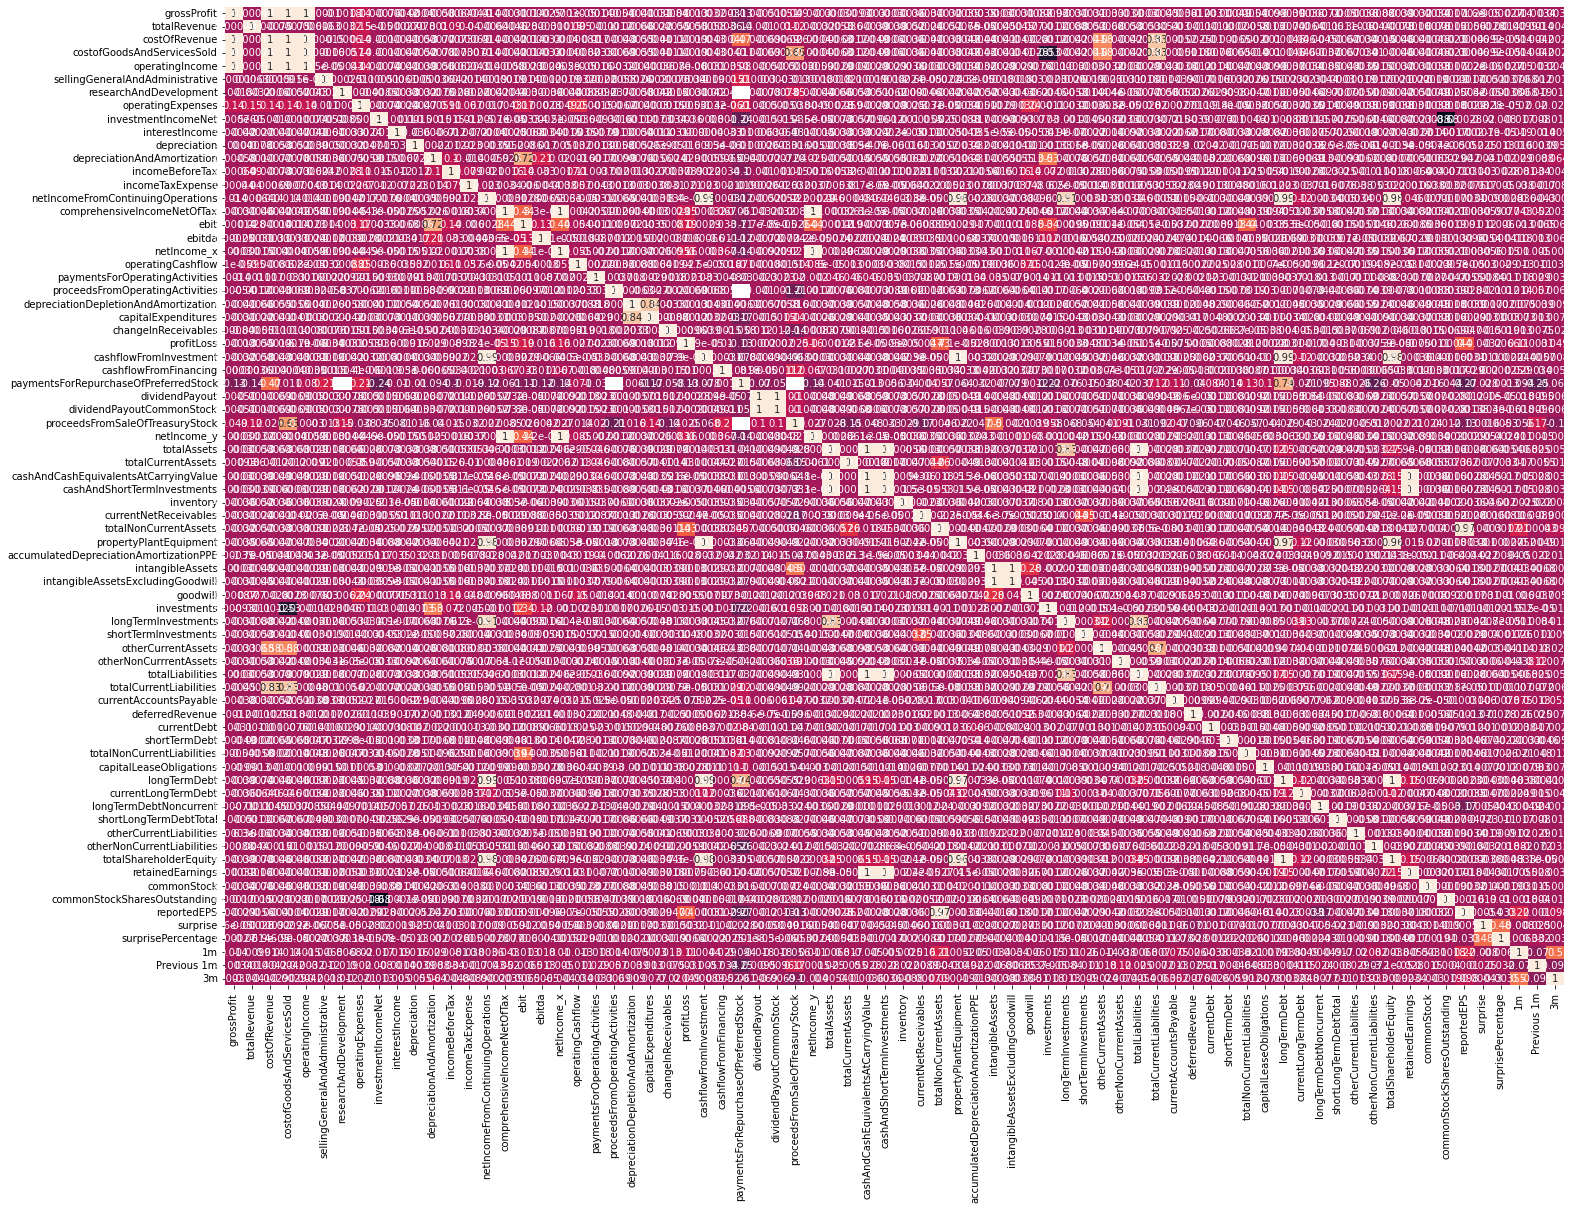

In [96]:
# correlation calculation
feature_corr = final_df.copy().corr()

# sorting and using 1m
sortedDesc = feature_corr["1m"].sort_values(ascending=False) 
print(sortedDesc.head(15))

plt.figure(figsize = (24,18))
sns.heatmap(feature_corr, annot=True, cbar=False, )

3m                                       1.000000
1m                                       0.495484
reportedEPS                              0.098482
totalNonCurrentAssets                    0.090326
depreciationAndAmortization              0.064425
currentAccountsPayable                   0.051502
profitLoss                               0.048603
otherNonCurrentLiabilities               0.032611
longTermInvestments                      0.012941
totalNonCurrentLiabilities               0.012472
totalCurrentAssets                       0.010393
depreciationDepletionAndAmortization     0.008977
shortTermInvestments                     0.008963
capitalLeaseObligations                  0.007809
capitalExpenditures                      0.007736
deferredRevenue                          0.007565
otherNonCurrrentAssets                   0.007378
proceedsFromOperatingActivities          0.006942
ebitda                                   0.006534
ebit                                     0.006491


<AxesSubplot:>

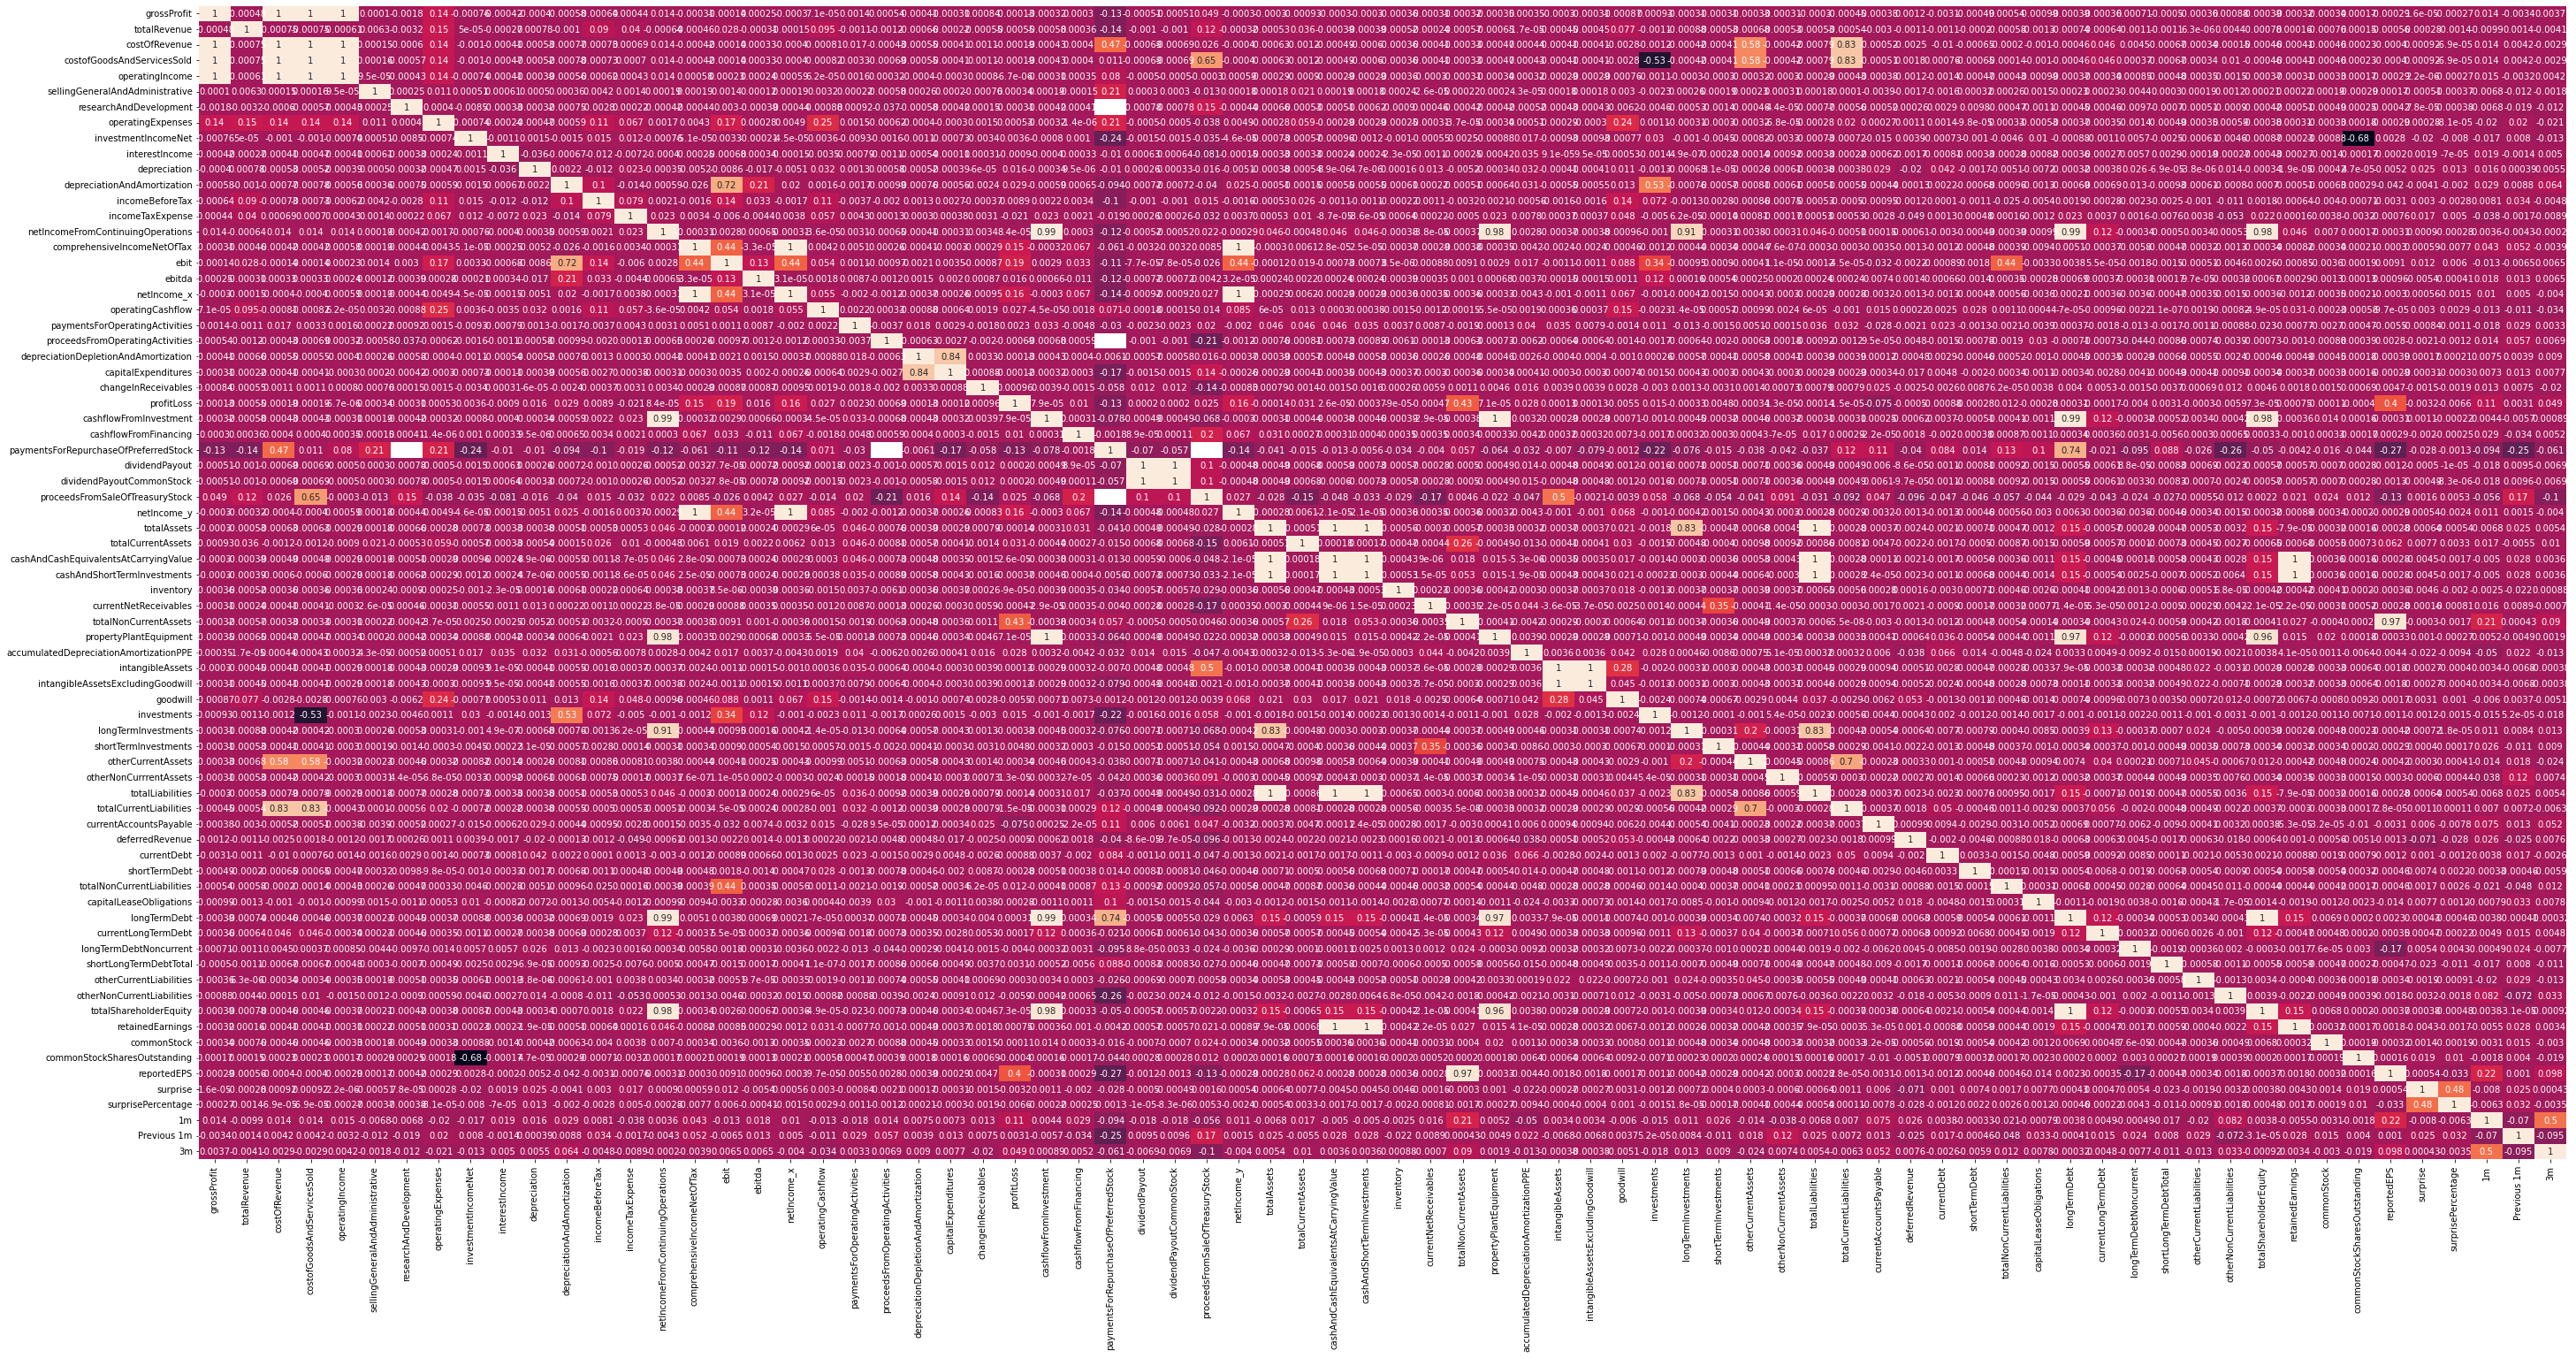

In [97]:
# sorting and using 3m
sortedDesc = feature_corr["3m"].sort_values(ascending=False) 
print(sortedDesc.head(50))

plt.figure(figsize = (48,24))
sns.heatmap(feature_corr, annot=True, cbar=False, )